### <font color = 'purple'> TIME SERIES ANALYSIS AND MODELING FOR FORECASTING THE ENERGY CONSUMPTION IN THE INDUSTRY

###### Prepared by: `Olanrewaju Adegoke`

##### Email: `Larrysman2004@yahoo.com`

In [1]:
import os
os.getcwd()

'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Time_Series_Analysis_Projects\\Energy_Consumption_Forecast_Project\\notebooks'

###### <font color = 'grey'> Define the path to the project folders

In [2]:
main = 'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Time_Series_Analysis_Projects\\Energy_Consumption_Forecast_Project'
data = '../data'
model = '../models'
notebk = '../notebooks'
output = '../outputs'
resource = '../resources'
visual = '../visuals'

###### <font color = 'grey'> Import the self-built customizable machine learning modules end-end

In [3]:
os.chdir(resource)

In [4]:
import olanrewaju as ol

In [5]:
os.chdir(notebk)
os.getcwd()

'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Time_Series_Analysis_Projects\\Energy_Consumption_Forecast_Project\\notebooks'

###### <font color = 'grey'> Import the necessary libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import time
from datetime import datetime

###### <font color = 'grey'> Load the data

In [7]:
os.chdir(data)

In [8]:
data = pd.read_csv('Energy_Consumption.csv')
data.head()

,Date,Period,OperationalLessIndustrial,Industrial
0,37257,1,3535.867064,1086.132936
1,37257,2,3383.499028,1088.500972
2,37257,3,3655.527552,1084.472448
3,37257,4,3510.446636,1085.553364
4,37257,5,3294.697156,1081.302844


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230784 entries, 0 to 230783
Data columns (total 4 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Date                       230784 non-null  int64  
 1   Period                     230784 non-null  int64  
 2   OperationalLessIndustrial  230736 non-null  float64
 3   Industrial                 230736 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 7.0 MB


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Date,230784.0,39660.500000,1387.953024,37257.000000,38458.750000,39660.500000,40862.250000,42064.000000
Period,230784.0,24.500000,13.853429,1.000000,12.750000,24.500000,36.250000,48.000000
OperationalLessIndustrial,230736.0,4638.962960,836.369503,2688.516606,3975.539745,4573.124873,5233.421258,9494.010992
Industrial,230736.0,1133.089038,115.111743,211.237656,1088.569214,1155.148966,1209.366814,1421.442200


In [11]:
data.shape

(230784, 4)

This type of date shows the number of days in the dataset and it represent the epochs type of date. For the calendar or date form, will adopt starts date from '1899-12-31'.

For this dataset, the period is taking at `30 minutes intervals` and comprises of `OperationalLessIndustrial` and `Industrial` and we would analyze each columns to understand patterns.

For a time series analysis, we need the date columns and any other other columns that is necessary for our forecast.

###### Copy the dataset before manipulating to maintain originality

In [12]:
df = data.copy()

###### Selecting the dataframe using the columns we want to work with from the dataset

In [13]:
df_ops = df.drop(columns=['Industrial'])
df_ind = df.drop(columns=['OperationalLessIndustrial'])

### <font color = 'green'> Analyzing the Opeartional Energy Consumption - df_ops data

In [14]:
df_ops.head()

,Date,Period,OperationalLessIndustrial
0,37257,1,3535.867064
1,37257,2,3383.499028
2,37257,3,3655.527552
3,37257,4,3510.446636
4,37257,5,3294.697156


###### <font color = 'grey'> Transform the Date column from epoch to a standard date format

In [15]:
df_ops['date_transformed'] = df_ops.Date.apply(lambda x: pd.Timestamp('1899-12-31') + pd.Timedelta(x, unit='days'))

In [16]:
df_ops.head()

,Date,Period,OperationalLessIndustrial,date_transformed
0,37257,1,3535.867064,2002-01-02
1,37257,2,3383.499028,2002-01-02
2,37257,3,3655.527552,2002-01-02
3,37257,4,3510.446636,2002-01-02
4,37257,5,3294.697156,2002-01-02


The new dataframe shows the `date in days` and since the `period are given in 30 minutes interval` we need to reflect that in the data so that the `30 minute interval window` is reflected.

###### <font color = 'grey'> Transform the 'date_transformed' columns to include the 30 minutes interval in the data - Accounting for the measurement cycle in our data

In [17]:
df_ops['date-time'] = df_ops['date_transformed'] + pd.to_timedelta((df_ops['Period'] - 1) * 30, unit='m')
df_ops.head()

,Date,Period,OperationalLessIndustrial,date_transformed,date-time
0,37257,1,3535.867064,2002-01-02,2002-01-02 00:00:00
1,37257,2,3383.499028,2002-01-02,2002-01-02 00:30:00
2,37257,3,3655.527552,2002-01-02,2002-01-02 01:00:00
3,37257,4,3510.446636,2002-01-02,2002-01-02 01:30:00
4,37257,5,3294.697156,2002-01-02,2002-01-02 02:00:00


###### Select columns for Operational Consumption Analysis

In [18]:
df_ops_used = df_ops[['OperationalLessIndustrial', 'date-time']]
df_ops_used.head()

,OperationalLessIndustrial,date-time
0,3535.867064,2002-01-02 00:00:00
1,3383.499028,2002-01-02 00:30:00
2,3655.527552,2002-01-02 01:00:00
3,3510.446636,2002-01-02 01:30:00
4,3294.697156,2002-01-02 02:00:00


###### Checking for missing and duplicate values

In [19]:
df_ops_used.isnull().sum()

OperationalLessIndustrial    48
date-time                     0
dtype: int64

In [20]:
df_ops_used.duplicated().sum()

0

###### <font color = 'grey'> Removing Missing Values from df_ops_used

###### Using the customizable built-in for correcting missing values

In [21]:
file = df_ops_used
df_ops_clean = ol.missing_value_corrector_v2(file)
df_ops_clean.isnull().sum()

C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Time_Series_Analysis_Projects\Energy_Consumption_Forecast_Project\resources\olanrewaju.py:251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file[col] = file[col].fillna(file[col].mean())


OperationalLessIndustrial    0
date-time                    0
dtype: int64

In [22]:
df_ops_clean.head()

,OperationalLessIndustrial,date-time
0,3535.867064,2002-01-02 00:00:00
1,3383.499028,2002-01-02 00:30:00
2,3655.527552,2002-01-02 01:00:00
3,3510.446636,2002-01-02 01:30:00
4,3294.697156,2002-01-02 02:00:00


###### <font color = 'grey'> Renaming the columns

In [23]:
df_ops_clean.columns = ['energy_demand', 'date-time-interval']
df_ops_clean.head()

,energy_demand,date-time-interval
0,3535.867064,2002-01-02 00:00:00
1,3383.499028,2002-01-02 00:30:00
2,3655.527552,2002-01-02 01:00:00
3,3510.446636,2002-01-02 01:30:00
4,3294.697156,2002-01-02 02:00:00


###### <font color = 'grey'> **In time series analysis, always make sure you change the data index column to the transformed date-time-interval column.**
If the index is not sorted, befroe converting, you will need to sort or reset_index

###### <font color = 'grey'> Convert date-time-interval column to the index column of time series data

In [24]:
df_ops_clean = df_ops_clean.set_index('date-time-interval')
df_ops_clean.head()

,energy_demand
date-time-interval,
2002-01-02 00:00:00,3535.867064
2002-01-02 00:30:00,3383.499028
2002-01-02 01:00:00,3655.527552
2002-01-02 01:30:00,3510.446636
2002-01-02 02:00:00,3294.697156


###### <font color = 'green'> Correcting the Inconsistence in data for time series

###### <font color = 'grey'> Resample the data to 1 hour intervals

In [25]:
df_ops_clean = df_ops_clean.resample('h')
df_ops_clean

In [26]:
len(df_ops_clean)

115392

###### <font color = 'grey'> Aggregate the resample 1 hour interval data

In [27]:
df_ops_clean = df_ops_clean.agg({'energy_demand':'sum'})
df_ops_clean.head()

,energy_demand
date-time-interval,
2002-01-02 00:00:00,6919.366092
2002-01-02 01:00:00,7165.974188
2002-01-02 02:00:00,6406.542994
2002-01-02 03:00:00,5815.537828
2002-01-02 04:00:00,5497.732922


##### <font color = 'purple'> Seasonality and Trends

In [28]:
# Get the Starting period

df_ops_clean.index.min()

Timestamp('2002-01-02 00:00:00')

In [29]:
# Get the Ending period

df_ops_clean.index.max()

Timestamp('2015-03-02 23:00:00')

###### <font color = 'purple'> Plot Seasonality by Day

In [30]:
hour = df_ops_clean.index.hour
hour

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       ...
       14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
      dtype='int32', name='date-time-interval', length=115392)

###### <font color = 'purple'> The Trend

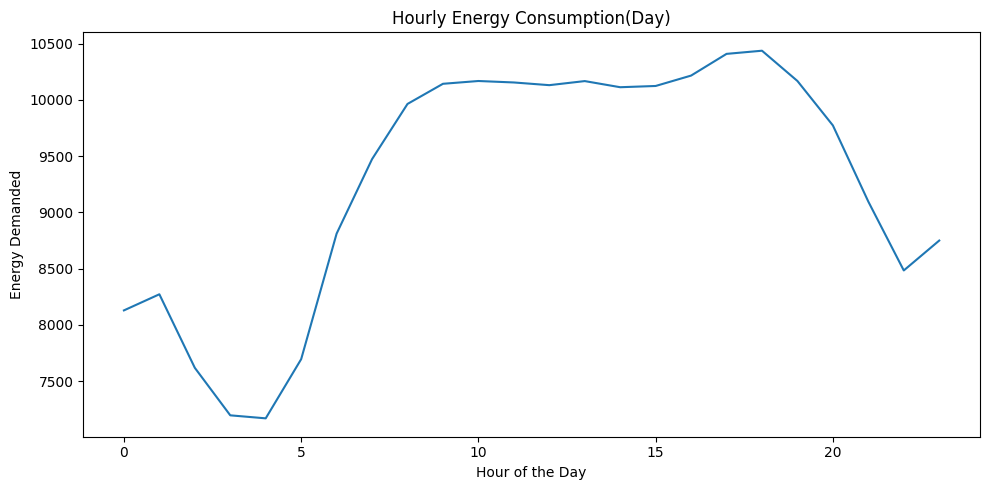

In [31]:
df_ops_clean.groupby(hour).mean(numeric_only=True)['energy_demand'].plot(figsize=(20, 5))
plt.title('Hourly Energy Consumption(Day)')
plt.xlabel('Hour of the Day')
plt.ylabel('Energy Demanded')
plt.tight_layout()

###### <font color = 'purple'> Seasonality by day of the week

In [32]:
dayofweek = df_ops_clean.index.dayofweek
dayofweek

Index([2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       ...
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype='int32', name='date-time-interval', length=115392)

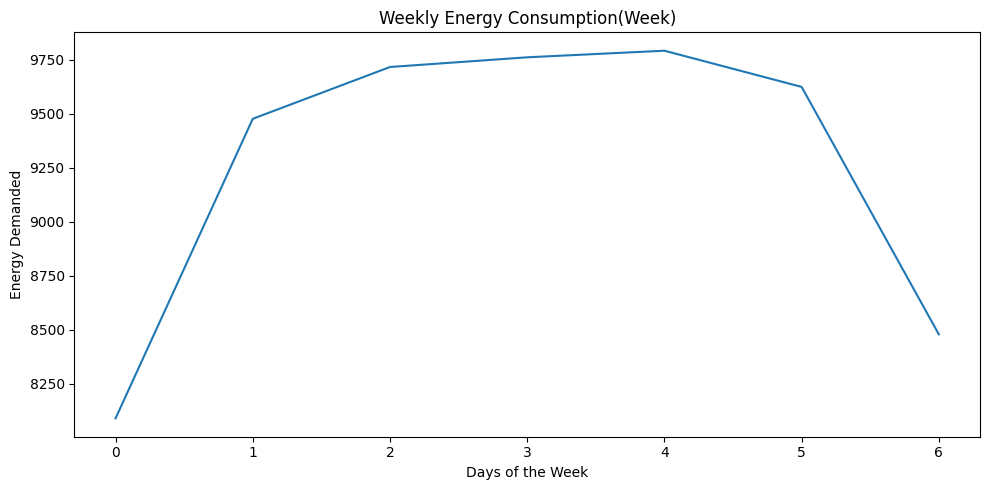

In [33]:
df_ops_clean.groupby(dayofweek).mean(numeric_only=True)['energy_demand'].plot(figsize=(20, 5))
plt.title('Weekly Energy Consumption(Week)')
plt.xlabel('Days of the Week')
plt.ylabel('Energy Demanded')
plt.tight_layout()

###### <font color = 'purple'> Seasonality by Month of the year

In [34]:
month = df_ops_clean.index.month
month

Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       ...
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype='int32', name='date-time-interval', length=115392)

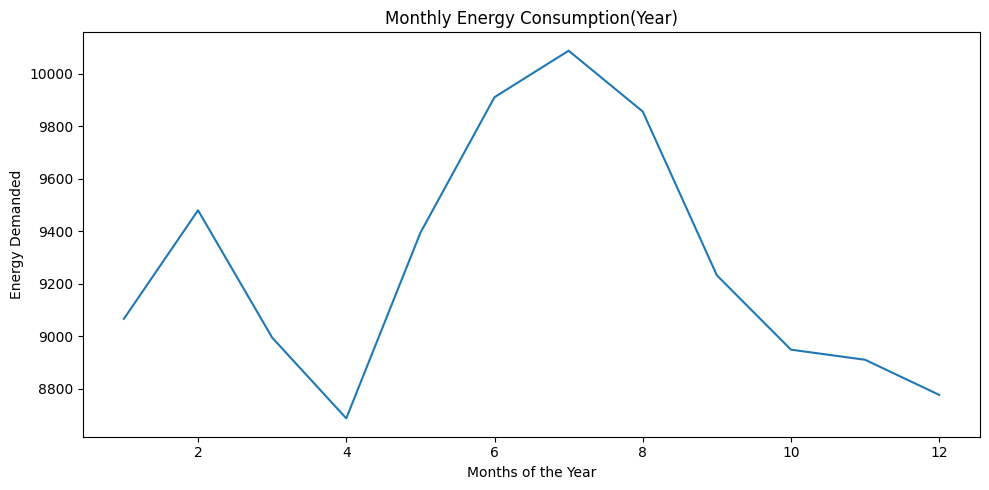

In [35]:
df_ops_clean.groupby(month).mean(numeric_only=True)['energy_demand'].plot(figsize=(20, 5))
plt.title('Monthly Energy Consumption(Year)')
plt.xlabel('Months of the Year')
plt.ylabel('Energy Demanded')
plt.tight_layout()

#### <font color = 'purple'> Analyzing the `Industrial Energy Consumption` data

In [36]:
df_ind.head()

,Date,Period,Industrial
0,37257,1,1086.132936
1,37257,2,1088.500972
2,37257,3,1084.472448
3,37257,4,1085.553364
4,37257,5,1081.302844


###### <font color = 'grey'> Transform the `Date` column from epoch to standard date format

In [37]:
df_ind['date_transformed'] = df_ind.Date.apply(lambda x: pd.Timestamp('1899-12-31') + pd.Timedelta(x, unit='days'))
df_ind.head()

,Date,Period,Industrial,date_transformed
0,37257,1,1086.132936,2002-01-02
1,37257,2,1088.500972,2002-01-02
2,37257,3,1084.472448,2002-01-02
3,37257,4,1085.553364,2002-01-02
4,37257,5,1081.302844,2002-01-02


**The new table shows the date in days and since the period are given in 30 minutes interval we need to reflect that in the data so that the 30 minutes interval is reflected.**

###### <font color = 'grey'> Extract the `year, dayofweek, month and quarter` from the `date_transformed`

In [38]:
df_ind['year'] = df_ind['date_transformed'].dt.year
df_ind['day_of_the_week'] = df_ind['date_transformed'].dt.strftime('%A')
df_ind['month'] = df_ind['date_transformed'].dt.weekday.map(
    {1: 'January', 2: 'February', 3: 'March',
     4: 'April', 5: 'May', 6: 'June',
     7: 'July', 8: 'August', 9: 'September',
     10: 'October', 11: 'November', 12: 'December'}
)
df_ind['quarter'] = df_ind['date_transformed'].dt.quarter.map({1: '1st_qtr', 2: '2nd_qtr', 3: '3rd_qtr', 4: '4th_qtr'})

In [39]:
df_ind.head()

,Date,Period,Industrial,date_transformed,year,day_of_the_week,month,quarter
0,37257,1,1086.132936,2002-01-02,2002,Wednesday,February,1st_qtr
1,37257,2,1088.500972,2002-01-02,2002,Wednesday,February,1st_qtr
2,37257,3,1084.472448,2002-01-02,2002,Wednesday,February,1st_qtr
3,37257,4,1085.553364,2002-01-02,2002,Wednesday,February,1st_qtr
4,37257,5,1081.302844,2002-01-02,2002,Wednesday,February,1st_qtr


###### <font color = 'grey'> Transform the `date_transformed` columns to include the 30 minutes interval in the data - Accounting for the measurement cycle in our data

In [40]:
df_ind['date-time'] = df_ind['date_transformed'] + pd.to_timedelta((df_ind['Period'] - 1) * 30, unit='m')
df_ind.head()

,Date,Period,Industrial,date_transformed,year,day_of_the_week,month,quarter,date-time
0,37257,1,1086.132936,2002-01-02,2002,Wednesday,February,1st_qtr,2002-01-02 00:00:00
1,37257,2,1088.500972,2002-01-02,2002,Wednesday,February,1st_qtr,2002-01-02 00:30:00
2,37257,3,1084.472448,2002-01-02,2002,Wednesday,February,1st_qtr,2002-01-02 01:00:00
3,37257,4,1085.553364,2002-01-02,2002,Wednesday,February,1st_qtr,2002-01-02 01:30:00
4,37257,5,1081.302844,2002-01-02,2002,Wednesday,February,1st_qtr,2002-01-02 02:00:00


###### <font coor = 'grey'> Select columns for Analysis

In [41]:
df_ind_used = df_ind[['date-time', 'Industrial']]
df_ind_used.head()

,date-time,Industrial
0,2002-01-02 00:00:00,1086.132936
1,2002-01-02 00:30:00,1088.500972
2,2002-01-02 01:00:00,1084.472448
3,2002-01-02 01:30:00,1085.553364
4,2002-01-02 02:00:00,1081.302844


###### <font color = 'grey'> Check for Missing Values

In [42]:
df_ind_used.isnull().sum()

date-time      0
Industrial    48
dtype: int64

###### <font color = 'grey'> Checking for duplicates

In [43]:
df_ind_used.duplicated().sum()

0

###### <font color = 'grey'> Removing the missing values

In [44]:
file = df_ind_used
df_ind_clean = ol.missing_value_corrector_v2(file)

C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Time_Series_Analysis_Projects\Energy_Consumption_Forecast_Project\resources\olanrewaju.py:251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file[col] = file[col].fillna(file[col].mean())


In [45]:
df_ind_clean.isnull().sum()

date-time     0
Industrial    0
dtype: int64

###### <font color = 'grey'> Change the dataset index to `date-time` 

In [46]:
df_ind_clean = df_ind_clean.set_index('date-time')
df_ind_clean.head()

,Industrial
date-time,
2002-01-02 00:00:00,1086.132936
2002-01-02 00:30:00,1088.500972
2002-01-02 01:00:00,1084.472448
2002-01-02 01:30:00,1085.553364
2002-01-02 02:00:00,1081.302844


###### <font color = 'grey'> Correct data inconsistencies using `resampling to the 1hour interval`

In [47]:
df_ind_clean = df_ind_clean.resample('h')
df_ind_clean

In [48]:
len(df_ind_clean)

115392

###### <font color = 'grey'> Aggregate the resample of the 1hr intervals

In [49]:
df_ind_clean = df_ind_clean.agg({'Industrial':'sum'})
df_ind_clean.head()

,Industrial
date-time,
2002-01-02 00:00:00,2174.633908
2002-01-02 01:00:00,2170.025812
2002-01-02 02:00:00,2167.457006
2002-01-02 03:00:00,2156.462172
2002-01-02 04:00:00,2162.267078


##### <font color = 'purple'> Seasonality and Trends

In [50]:
# Minimum Year
df_ind_clean.index.min()

Timestamp('2002-01-02 00:00:00')

In [51]:
# Maximum year
df_ind_clean.index.max()

Timestamp('2015-03-02 23:00:00')

###### <font color = 'purple'> Seasonality and Trend by day

In [52]:
hour = df_ind_clean.index.hour
hour

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       ...
       14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
      dtype='int32', name='date-time', length=115392)

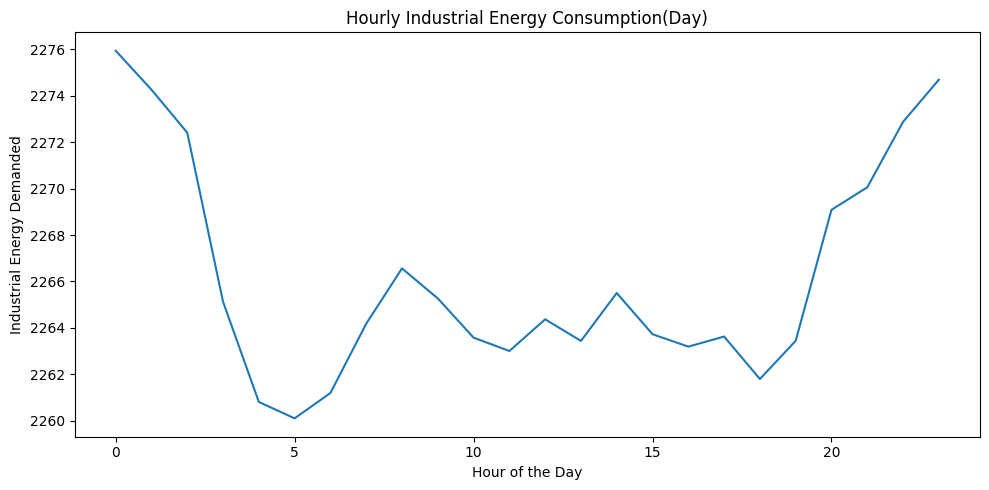

In [53]:
df_ind_clean.groupby(hour).mean(numeric_only=True)['Industrial'].plot(figsize=(20, 5))
plt.title('Hourly Industrial Energy Consumption(Day)')
plt.xlabel('Hour of the Day')
plt.ylabel('Industrial Energy Demanded')
plt.tight_layout()

###### <font color = 'purple'> Seasonality and Trend by day of the week

In [54]:
dayofweek = df_ind_clean.index.dayofweek
dayofweek

Index([2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       ...
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype='int32', name='date-time', length=115392)

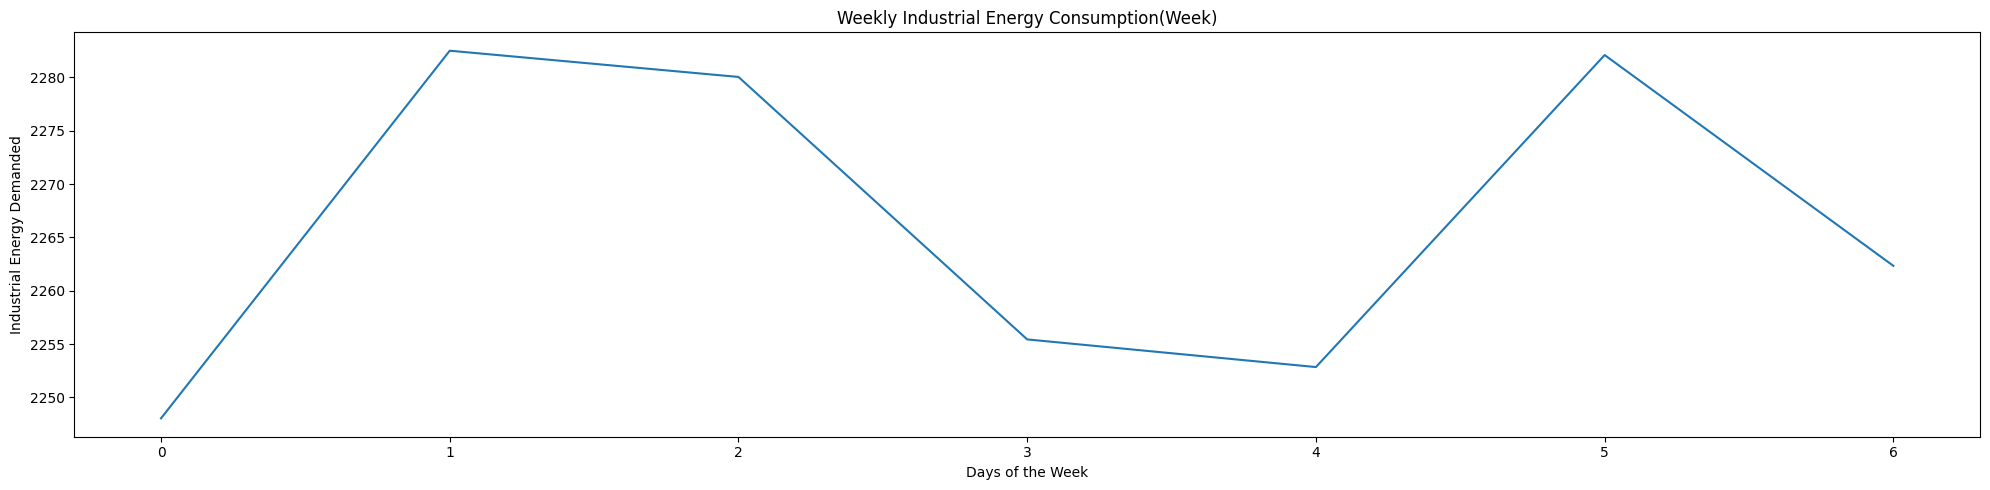

In [55]:
df_ind_clean.groupby(dayofweek).mean(numeric_only=True)['Industrial'].plot(figsize=(20, 5))
plt.title('Weekly Industrial Energy Consumption(Week)')
plt.xlabel('Days of the Week')
plt.ylabel('Industrial Energy Demanded')
plt.tight_layout()

###### <font color = 'purple'> Seasonality and Trend by Month of the Year

In [56]:
month = df_ind_clean.index.month
month

Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       ...
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype='int32', name='date-time', length=115392)

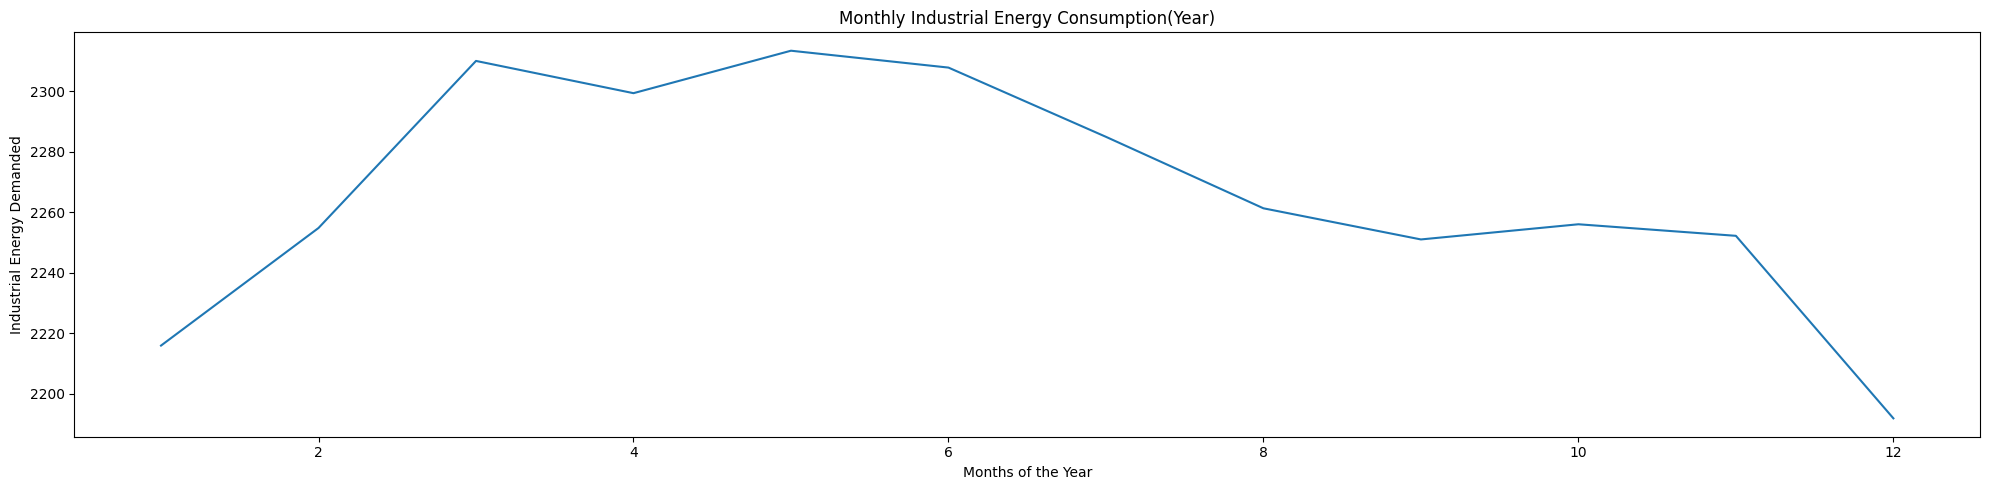

In [57]:
df_ind_clean.groupby(month).mean(numeric_only=True)['Industrial'].plot(figsize=(20, 5))
plt.title('Monthly Industrial Energy Consumption(Year)')
plt.xlabel('Months of the Year')
plt.ylabel('Industrial Energy Demanded')
plt.tight_layout()

### <font color = 'purple'> Analyzing the energy consumption by `aggregation` to obtain the `Total Energy Consumed` Over a Period

In [58]:
data.head()

,Date,Period,OperationalLessIndustrial,Industrial
0,37257,1,3535.867064,1086.132936
1,37257,2,3383.499028,1088.500972
2,37257,3,3655.527552,1084.472448
3,37257,4,3510.446636,1085.553364
4,37257,5,3294.697156,1081.302844


In [59]:
data['total_energy'] = data['OperationalLessIndustrial'] + data['Industrial']
data.head()

,Date,Period,OperationalLessIndustrial,Industrial,total_energy
0,37257,1,3535.867064,1086.132936,4622.0
1,37257,2,3383.499028,1088.500972,4472.0
2,37257,3,3655.527552,1084.472448,4740.0
3,37257,4,3510.446636,1085.553364,4596.0
4,37257,5,3294.697156,1081.302844,4376.0


###### <font color = 'purple'> Transform the Date column to standard date time format

In [60]:
data['date'] = data.Date.apply(lambda y: pd.Timestamp('1899-12-31') + pd.Timedelta(y, unit='days'))
data.head()

,Date,Period,OperationalLessIndustrial,Industrial,total_energy,date
0,37257,1,3535.867064,1086.132936,4622.0,2002-01-02
1,37257,2,3383.499028,1088.500972,4472.0,2002-01-02
2,37257,3,3655.527552,1084.472448,4740.0,2002-01-02
3,37257,4,3510.446636,1085.553364,4596.0,2002-01-02
4,37257,5,3294.697156,1081.302844,4376.0,2002-01-02


###### <font color = 'purple'> Transform the `date` column to include the `30 minutes intervals`

In [61]:
data['date-time'] = data['date'] + pd.to_timedelta((data['Period'] - 1) * 30, unit='m')
data.head()

,Date,Period,OperationalLessIndustrial,Industrial,total_energy,date,date-time
0,37257,1,3535.867064,1086.132936,4622.0,2002-01-02,2002-01-02 00:00:00
1,37257,2,3383.499028,1088.500972,4472.0,2002-01-02,2002-01-02 00:30:00
2,37257,3,3655.527552,1084.472448,4740.0,2002-01-02,2002-01-02 01:00:00
3,37257,4,3510.446636,1085.553364,4596.0,2002-01-02,2002-01-02 01:30:00
4,37257,5,3294.697156,1081.302844,4376.0,2002-01-02,2002-01-02 02:00:00


###### <font color = 'purple'> Checking for Missing Values and Duplicates

In [62]:
data.isnull().sum()

Date                          0
Period                        0
OperationalLessIndustrial    48
Industrial                   48
total_energy                 48
date                          0
date-time                     0
dtype: int64

In [63]:
data.duplicated().sum()

0

###### <font color = 'purple'> Correcting the Missing Values

In [64]:
file = data
data_clean = ol.missing_value_corrector_v2(file)
data_clean.isnull().sum()

Date                         0
Period                       0
OperationalLessIndustrial    0
Industrial                   0
total_energy                 0
date                         0
date-time                    0
dtype: int64

###### <font color = 'purple'> Select the columns of interest

In [65]:
data_clean = data_clean[['date-time', 'OperationalLessIndustrial', 'Industrial', 'total_energy']]
data_clean.head()

,date-time,OperationalLessIndustrial,Industrial,total_energy
0,2002-01-02 00:00:00,3535.867064,1086.132936,4622.0
1,2002-01-02 00:30:00,3383.499028,1088.500972,4472.0
2,2002-01-02 01:00:00,3655.527552,1084.472448,4740.0
3,2002-01-02 01:30:00,3510.446636,1085.553364,4596.0
4,2002-01-02 02:00:00,3294.697156,1081.302844,4376.0


In [66]:
data_clean.columns = ['date-time', 'operations', 'industrial', 'total_energy']
data_clean.head()

,date-time,operations,industrial,total_energy
0,2002-01-02 00:00:00,3535.867064,1086.132936,4622.0
1,2002-01-02 00:30:00,3383.499028,1088.500972,4472.0
2,2002-01-02 01:00:00,3655.527552,1084.472448,4740.0
3,2002-01-02 01:30:00,3510.446636,1085.553364,4596.0
4,2002-01-02 02:00:00,3294.697156,1081.302844,4376.0


###### <font color = 'purple'> Change the dataset index to date-time

In [67]:
data_clean = data_clean.set_index('date-time')
data_clean.head()

,operations,industrial,total_energy
date-time,,,
2002-01-02 00:00:00,3535.867064,1086.132936,4622.0
2002-01-02 00:30:00,3383.499028,1088.500972,4472.0
2002-01-02 01:00:00,3655.527552,1084.472448,4740.0
2002-01-02 01:30:00,3510.446636,1085.553364,4596.0
2002-01-02 02:00:00,3294.697156,1081.302844,4376.0


###### <font color = 'purple'> Correct for data inconsistence using resampling for 1 hour interval

In [68]:
data_clean = data_clean.resample('h')
data_clean

###### <font color = 'purple'> Aggregation of the resampled data into 1 hour interval

In [69]:
data_clean = data_clean.agg({'operations':'sum','industrial':'sum','total_energy':'sum'})
data_clean.head()

,operations,industrial,total_energy
date-time,,,
2002-01-02 00:00:00,6919.366092,2174.633908,9094.0
2002-01-02 01:00:00,7165.974188,2170.025812,9336.0
2002-01-02 02:00:00,6406.542994,2167.457006,8574.0
2002-01-02 03:00:00,5815.537828,2156.462172,7972.0
2002-01-02 04:00:00,5497.732922,2162.267078,7660.0


###### <font color = 'purple'> Seasonality and Trends

In [70]:
data_clean.index.min()

Timestamp('2002-01-02 00:00:00')

In [71]:
data_clean.index.max()

Timestamp('2015-03-02 23:00:00')

###### <font color = 'purple'> Seasonality and Trend by day

In [72]:
hour = data_clean.index.hour
hour

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       ...
       14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
      dtype='int32', name='date-time', length=115392)

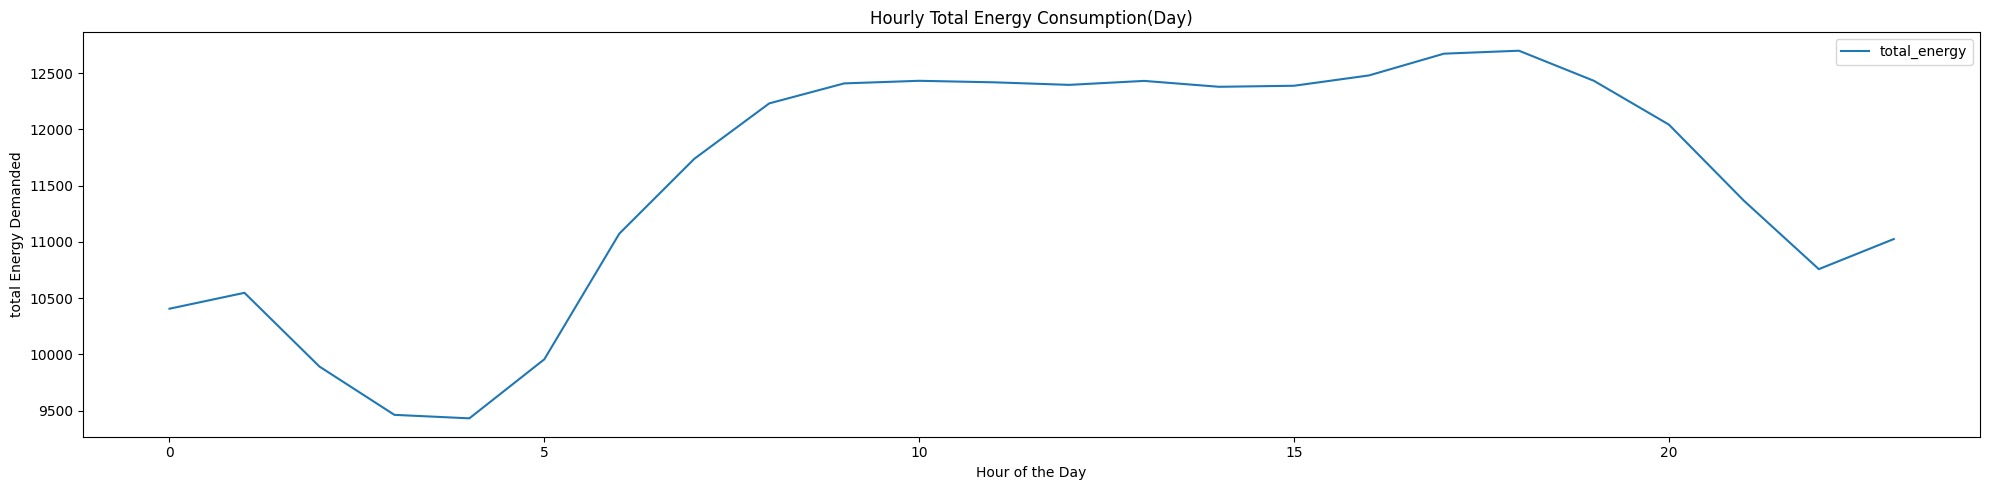

In [73]:
data_clean.groupby(hour).mean(numeric_only=True)[['total_energy']].plot(figsize=(20, 5))
plt.title('Hourly Total Energy Consumption(Day)')
plt.xlabel('Hour of the Day')
plt.ylabel('total Energy Demanded')
plt.tight_layout()

###### <font color = 'purple'> Seasonality and Trend for the day of the week 

In [74]:
dayofweek = data_clean.index.dayofweek
dayofweek

Index([2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       ...
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype='int32', name='date-time', length=115392)

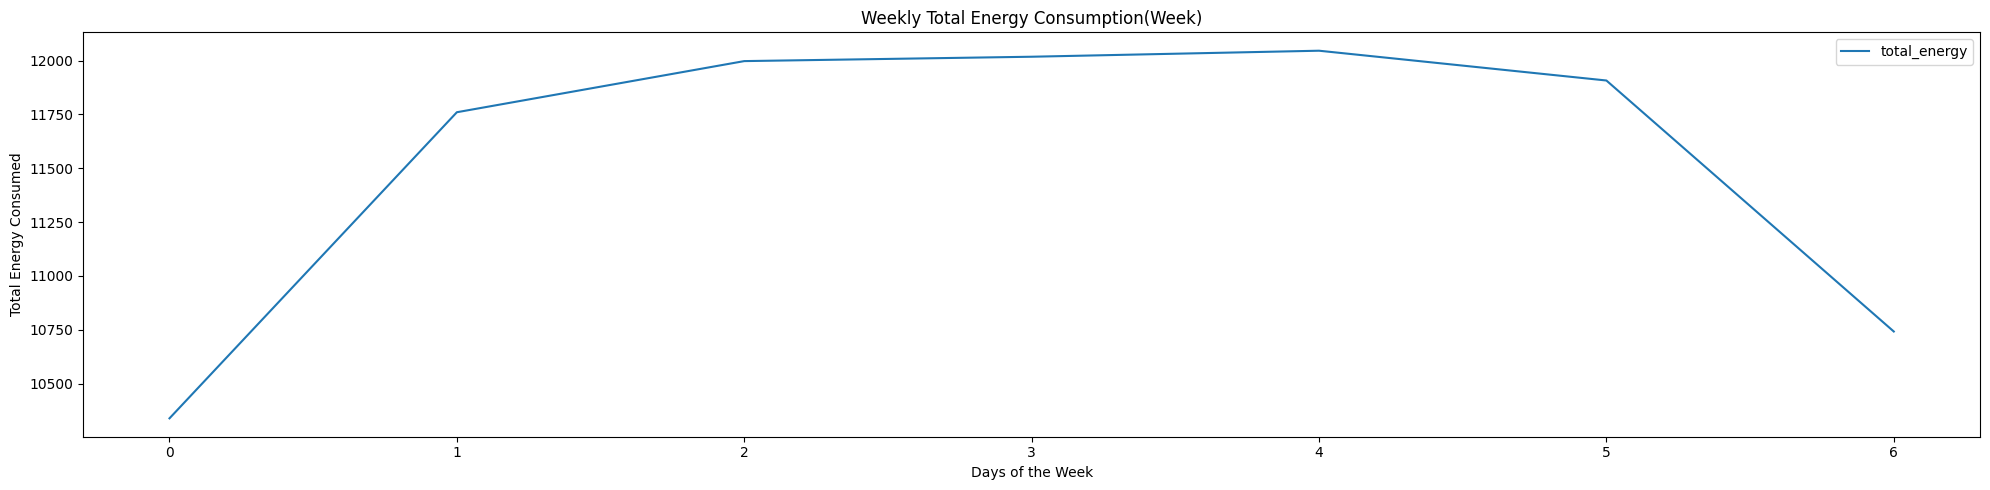

In [75]:
data_clean.groupby(dayofweek).mean(numeric_only=True)[['total_energy']].plot(figsize=(20,5))
plt.title('Weekly Total Energy Consumption(Week)')
plt.xlabel('Days of the Week')
plt.ylabel('Total Energy Consumed')
plt.tight_layout()

###### <font color = 'purple'> Seasonality and Trend by the Month of the Year 

In [76]:
month = data_clean.index.month
month

Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       ...
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype='int32', name='date-time', length=115392)

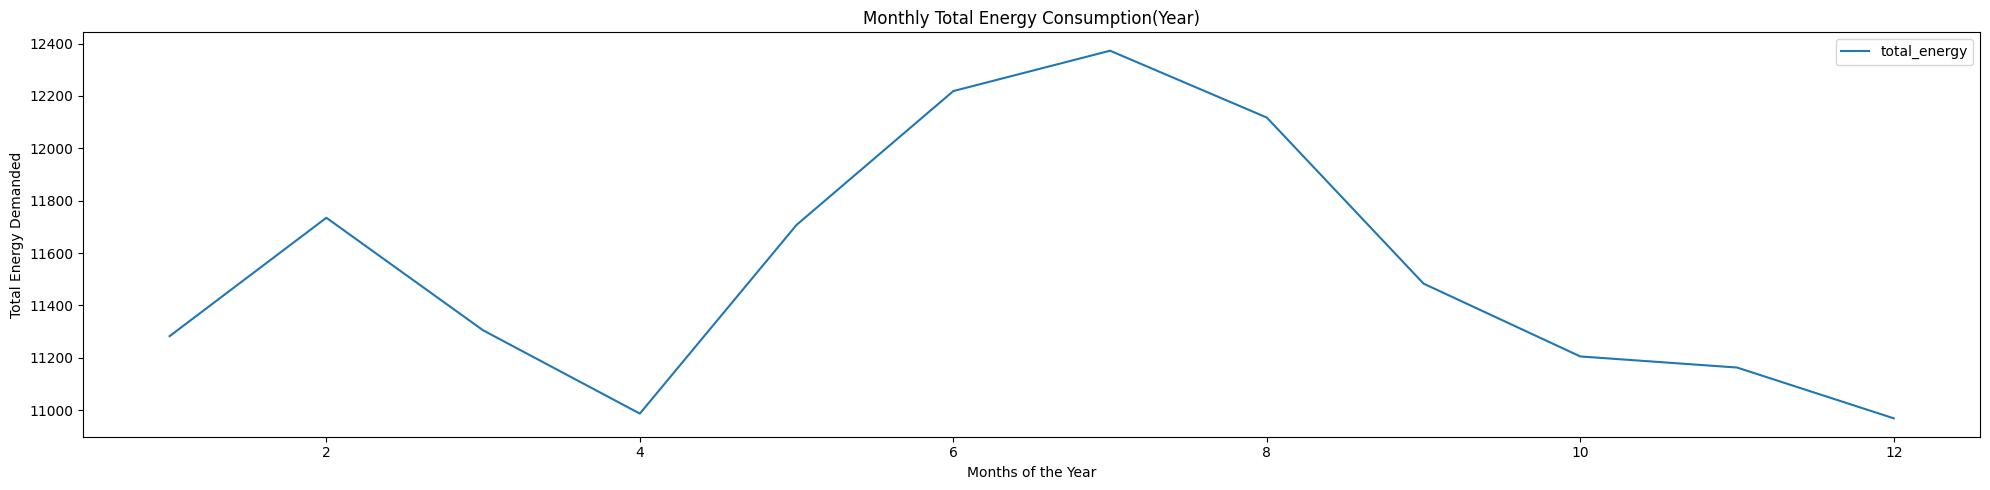

In [77]:
data_clean.groupby(month).mean(numeric_only=True)[['total_energy']].plot(figsize=(20, 5))
plt.title('Monthly Total Energy Consumption(Year)')
plt.xlabel('Months of the Year')
plt.ylabel('Total Energy Demanded')
plt.tight_layout()

## <font color = 'purple'> Modeling the `Time Series Data` for Forecasting

In time series, predictions or forecast is possible because of the knowledge of the previous event that is, you can predict a pattern or behaviour in a time series dataset with the past or previous knowledge.

Modeling in time series is unique because, we are the ones that will generate features from the dataset to be use in building the model and this is handled strategically.

### <font color = 'green'> Modeling the Operational Energy Consumption

##### <font color = 'red'> Building the `time series model` using the `df_ops_clean` dataset

In [78]:
df_ops_clean.head()

,energy_demand
date-time-interval,
2002-01-02 00:00:00,6919.366092
2002-01-02 01:00:00,7165.974188
2002-01-02 02:00:00,6406.542994
2002-01-02 03:00:00,5815.537828
2002-01-02 04:00:00,5497.732922


###### Resample to correct data inconsistence to an hourly interval

In [80]:
df_ops_clean = df_ops_clean.resample('h')

In [81]:
len(df_ops_clean)

115392

###### Aggregate the resample data by sum using the energy_demand column

In [82]:
df_ops_clean = df_ops_clean.agg({'energy_demand':'sum'})
df_ops_clean.head()

,energy_demand
date-time-interval,
2002-01-02 00:00:00,6919.366092
2002-01-02 01:00:00,7165.974188
2002-01-02 02:00:00,6406.542994
2002-01-02 03:00:00,5815.537828
2002-01-02 04:00:00,5497.732922


##### Features Engineering

*This dataset is shift by `1hour` when resampled and hence we would need to create features using this `one hour shift window`.*

###### Time Shifting - Generate new features in the dataset that lags by the 1hr time interval. This can be a choice depending on the insights you are interested in.

###### hour_to_date
###### month_to_date
###### year_to_date

In [83]:
df_copy = df_ops_clean.copy()

###### *One-Hour Period Shift*

In [84]:
lag = '1h'

df_copy[f'{lag}_lag'] = df_copy.energy_demand.shift(freq=lag)

df_copy.head()

,energy_demand,1h_lag
date-time-interval,,
2002-01-02 00:00:00,6919.366092,NaN
2002-01-02 01:00:00,7165.974188,6919.366092
2002-01-02 02:00:00,6406.542994,7165.974188
2002-01-02 03:00:00,5815.537828,6406.542994
2002-01-02 04:00:00,5497.732922,5815.537828


###### *24-Hour Period Shift - 24hours contains 24 unique measurements -> 1 - 24*

In [85]:
lag = '24h'

df_copy[f'{lag}_lag'] = df_copy.energy_demand.shift(freq=lag)

df_copy.head()

,energy_demand,1h_lag,24h_lag
date-time-interval,,,
2002-01-02 00:00:00,6919.366092,NaN,NaN
2002-01-02 01:00:00,7165.974188,6919.366092,NaN
2002-01-02 02:00:00,6406.542994,7165.974188,NaN
2002-01-02 03:00:00,5815.537828,6406.542994,NaN
2002-01-02 04:00:00,5497.732922,5815.537828,NaN


###### *Lagging by week shift - week contains 6 unique measurements -> 1 - 6. The 7th day is the starting point*

In [86]:
lag = '6d'

df_copy[f'{lag}_lag'] = df_copy.energy_demand.shift(freq=lag)

df_copy.head()

,energy_demand,1h_lag,24h_lag,6d_lag
date-time-interval,,,,
2002-01-02 00:00:00,6919.366092,NaN,NaN,NaN
2002-01-02 01:00:00,7165.974188,6919.366092,NaN,NaN
2002-01-02 02:00:00,6406.542994,7165.974188,NaN,NaN
2002-01-02 03:00:00,5815.537828,6406.542994,NaN,NaN
2002-01-02 04:00:00,5497.732922,5815.537828,NaN,NaN


In [87]:
df_copy.tail()

,energy_demand,1h_lag,24h_lag,6d_lag
date-time-interval,,,,
2015-03-02 19:00:00,9277.925921,9277.925921,9596.777060,9809.917230
2015-03-02 20:00:00,9277.925921,9277.925921,8883.230296,9259.823576
2015-03-02 21:00:00,9277.925921,9277.925921,8320.260550,8373.408904
2015-03-02 22:00:00,9277.925921,9277.925921,8110.055916,8030.429152
2015-03-02 23:00:00,9277.925921,9277.925921,8519.368752,8551.848448


###### Windowing - what interval makes sense for changes in the dataset to be observable

###### The minimum hour is 1hr in the dataset, we choose a window slightly above 1hr but not too far so that observable changes are not lost.

###### <font color = 'grey'> Rolling Window - `3hr rolling window -> moving average` with `mean and std` as aggregation for energy consumed

In [88]:
lag = '1h'   # frequency of the time interval y shift of 1hr

window_size = 3   # 3 time_interval moving average - 3 hours moving average

mv_avg = df_copy.energy_demand.rolling(window=window_size).agg(['mean','std']).shift(freq=lag)

In [89]:
mv_avg.head()

,mean,std
date-time-interval,,
2002-01-02 01:00:00,NaN,NaN
2002-01-02 02:00:00,NaN,NaN
2002-01-02 03:00:00,6830.627758,387.414253
2002-01-02 04:00:00,6462.685003,676.966421
2002-01-02 05:00:00,5906.604581,461.198224


In [90]:
mv_avg = mv_avg.add_prefix('3hr_rolling_window_')
mv_avg.head()

,3hr_rolling_window_mean,3hr_rolling_window_std
date-time-interval,,
2002-01-02 01:00:00,NaN,NaN
2002-01-02 02:00:00,NaN,NaN
2002-01-02 03:00:00,6830.627758,387.414253
2002-01-02 04:00:00,6462.685003,676.966421
2002-01-02 05:00:00,5906.604581,461.198224


###### <font color = 'grey'> Daily Moving Average - `24 hours rolling window`

In [91]:
lag = '1h'

window_size = 24

mv_avg_24hr = df_copy.energy_demand.rolling(window=window_size).agg(['mean','std']).shift(freq=lag)

mv_avg_24hr.head(25)

,mean,std
date-time-interval,,
2002-01-02 01:00:00,NaN,NaN
2002-01-02 02:00:00,NaN,NaN
2002-01-02 03:00:00,NaN,NaN
2002-01-02 04:00:00,NaN,NaN
2002-01-02 05:00:00,NaN,NaN
2002-01-02 06:00:00,NaN,NaN
2002-01-02 07:00:00,NaN,NaN
2002-01-02 08:00:00,NaN,NaN
2002-01-02 09:00:00,NaN,NaN


In [92]:
mv_avg_24hr = mv_avg_24hr.add_prefix('24hr_rolling_window_')
mv_avg_24hr.head(2)

,24hr_rolling_window_mean,24hr_rolling_window_std
date-time-interval,,
2002-01-02 01:00:00,NaN,NaN
2002-01-02 02:00:00,NaN,NaN


###### <font color = 'purple'> Merging the statistics and the features created

In [93]:
dfFinal = pd.concat([df_copy, mv_avg, mv_avg_24hr], axis=1)
dfFinal.head()

,energy_demand,1h_lag,24h_lag,6d_lag,3hr_rolling_window_mean,3hr_rolling_window_std,24hr_rolling_window_mean,24hr_rolling_window_std
date-time-interval,,,,,,,,
2002-01-02 00:00:00,6919.366092,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-02 01:00:00,7165.974188,6919.366092,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-02 02:00:00,6406.542994,7165.974188,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-02 03:00:00,5815.537828,6406.542994,NaN,NaN,6830.627758,387.414253,NaN,NaN
2002-01-02 04:00:00,5497.732922,5815.537828,NaN,NaN,6462.685003,676.966421,NaN,NaN


In [94]:
dfFinal['month'] = dfFinal.index.month
dfFinal['day'] = dfFinal.index.dayofweek
dfFinal['hour'] = dfFinal.index.hour

In [95]:
dfFinal.head(2)

,energy_demand,1h_lag,24h_lag,6d_lag,3hr_rolling_window_mean,3hr_rolling_window_std,24hr_rolling_window_mean,24hr_rolling_window_std,month,day,hour
date-time-interval,,,,,,,,,,,
2002-01-02 00:00:00,6919.366092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,0
2002-01-02 01:00:00,7165.974188,6919.366092,NaN,NaN,NaN,NaN,NaN,NaN,1,2,1


We are done with the creating of additional features and hence we can treat the dataset by removing the missing values.

In [96]:
dfFinal.isnull().sum()

energy_demand                 1
1h_lag                        2
24h_lag                      25
6d_lag                      145
3hr_rolling_window_mean       3
3hr_rolling_window_std        3
24hr_rolling_window_mean     24
24hr_rolling_window_std      24
month                         0
day                           0
hour                          0
dtype: int64

In [97]:
dfFinal = dfFinal.dropna()

,energy_demand,1h_lag,24h_lag,6d_lag,3hr_rolling_window_mean,3hr_rolling_window_std,24hr_rolling_window_mean,24hr_rolling_window_std,month,day,hour
date-time-interval,,,,,,,,,,,
2002-01-08 00:00:00,6808.008916,7290.234268,6722.984526,6919.366092,7060.366613,268.288238,7172.477074,882.158974,1,1,0
2002-01-08 01:00:00,7209.285712,6808.008916,7140.591176,7165.974188,6954.605689,291.436254,7176.019757,880.444422,1,1,1
2002-01-08 02:00:00,6535.818342,7209.285712,6562.022104,6406.542994,7102.509632,258.236657,7178.882029,880.435899,1,1,2
2002-01-08 03:00:00,6112.382636,6535.818342,5976.020780,5815.537828,6851.037657,338.789284,7177.790206,881.249994,1,1,3
2002-01-08 04:00:00,6165.882096,6112.382636,5688.468222,5497.732922,6619.162230,553.180569,7183.471950,873.570993,1,1,4


In [98]:
dfFinal.isnull().sum()

energy_demand               0
1h_lag                      0
24h_lag                     0
6d_lag                      0
3hr_rolling_window_mean     0
3hr_rolling_window_std      0
24hr_rolling_window_mean    0
24hr_rolling_window_std     0
month                       0
day                         0
hour                        0
dtype: int64

### <font color = 'green'> Splitting the Dataset

###### The split is done by separating the `features X and target y`

In [99]:
dfFinal.head(2)

,energy_demand,1h_lag,24h_lag,6d_lag,3hr_rolling_window_mean,3hr_rolling_window_std,24hr_rolling_window_mean,24hr_rolling_window_std,month,day,hour
date-time-interval,,,,,,,,,,,
2002-01-08 00:00:00,6808.008916,7290.234268,6722.984526,6919.366092,7060.366613,268.288238,7172.477074,882.158974,1,1,0
2002-01-08 01:00:00,7209.285712,6808.008916,7140.591176,7165.974188,6954.605689,291.436254,7176.019757,880.444422,1,1,1


In [100]:
X = dfFinal.drop(columns=['energy_demand'])
y = dfFinal['energy_demand']

In [101]:
X.head(2)

,1h_lag,24h_lag,6d_lag,3hr_rolling_window_mean,3hr_rolling_window_std,24hr_rolling_window_mean,24hr_rolling_window_std,month,day,hour
date-time-interval,,,,,,,,,,
2002-01-08 00:00:00,7290.234268,6722.984526,6919.366092,7060.366613,268.288238,7172.477074,882.158974,1,1,0
2002-01-08 01:00:00,6808.008916,7140.591176,7165.974188,6954.605689,291.436254,7176.019757,880.444422,1,1,1


In [102]:
y.head(2)

date-time-interval
2002-01-08 00:00:00    6808.008916
2002-01-08 01:00:00    7209.285712
Freq: h, Name: energy_demand, dtype: float64

In [103]:
X.index.min()

Timestamp('2002-01-08 00:00:00')

In [104]:
X.index.max()

Timestamp('2015-03-02 23:00:00')

#### <font color = 'grey'> Train_Test_Split in Time Series

`In Time series, our train_test_split is done in a way that maintains the continuous trend without break so our approach in splitting is done such that we just choose a cut-off point.`

In [105]:
end_train = '2014-12-31 23:59:59'

X_train = X.loc[:end_train]
X_test = X.loc[end_train:]

y_train = y.loc[:end_train]
y_test = y.loc[end_train:]

In [106]:
print(f"length of X_train is {len(X_train)} and the length of X_test is {len(X_test)}")
print('')
print(f"length of y_train is {len(y_train)} and the length of y_test is {len(y_test)}")

length of X_train is 113784 and the length of X_test is 1464

length of y_train is 113784 and the length of y_test is 1464


Please note that any data reserved for test in time series is a lost opportunity for the model to learn, so we only consider avery small amount of data to be reserved for testing.

#### <font color = 'green'> Building the `Operational Energy` Consumption Model

###### <font color = 'grey'> Least Absolute Shrinkage and Selection Operator - LASSO

In [107]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [108]:
seed = 42

In [109]:
model_lasso = Lasso(random_state=seed)
model_lasso

Lasso(random_state=42)

###### <font color = 'grey'> Train the model on the data

In [110]:
model_lasso.fit(X_train, y_train)

Lasso(random_state=42)

###### <font color = 'grey'> Prediction with the model

In [111]:
y_pred = model_lasso.predict(X_test)
y_pred[:5]

array([8075.38593985, 7169.53977639, 6391.46680942, 6161.15323187,
       6260.88297486])

In [113]:
y_pred_df = pd.Series(y_pred, index=y_test.index)
y_pred_df.head(2)

date-time-interval
2015-01-01 00:00:00    8075.385940
2015-01-01 01:00:00    7169.539776
Freq: h, dtype: float64

###### <font color = 'grey'> Score the Model

In [114]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def model_performance():
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"mean_squared_error is: {round(mse,2)}Kw")
    print(f"root_mean_squared_error is: {round(rmse,2)}Kw")
    print(f"mean_absolute_error is: {round(mae,2)}Kw")
    print(f"coefficient_of_determination is: {round(r2,2)*100}%")

model_performance()

mean_squared_error is: 163346.89Kw
root_mean_squared_error is: 404.16Kw
mean_absolute_error is: 315.24Kw
coefficient_of_determination is: 95.0%


In [115]:
y_test.head(2)

date-time-interval
2015-01-01 00:00:00    7566.135266
2015-01-01 01:00:00    6985.052416
Freq: h, Name: energy_demand, dtype: float64

##### <font color = 'purple'> Visualization of the Performance of the model on the train and test data

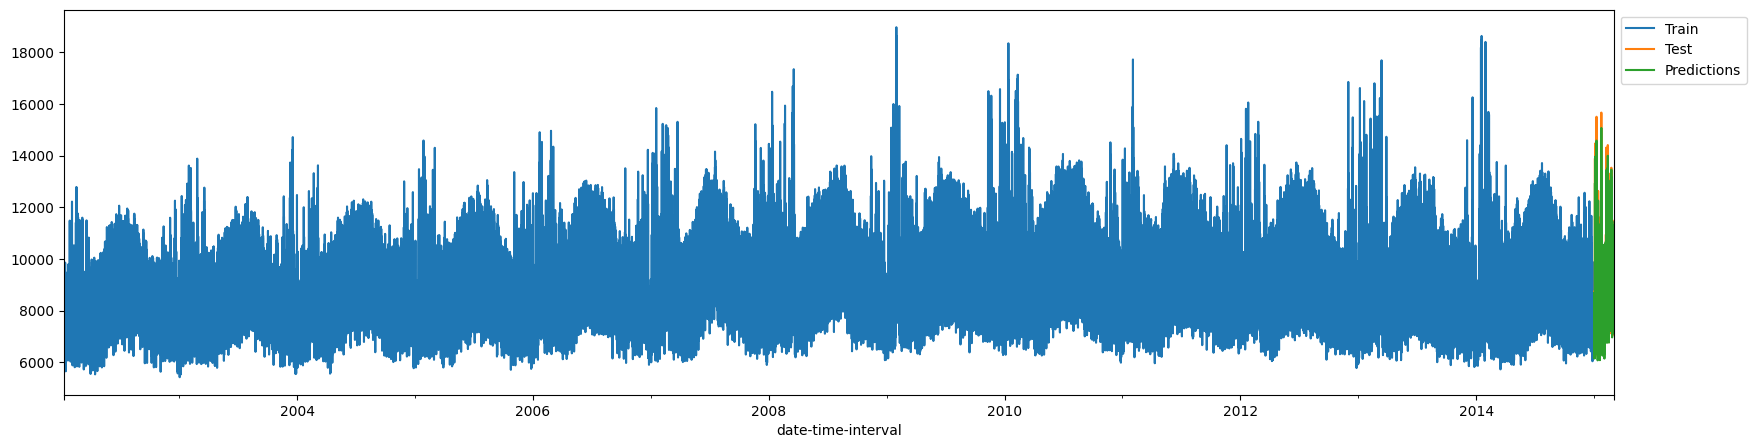

In [116]:
fig, ax = plt.subplots(figsize=(20,5))

y_train.plot(ax=ax, label='Train')
y_test.plot(ax=ax, label='Test')
y_pred_df.plot(ax=ax, label='Predictions')
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

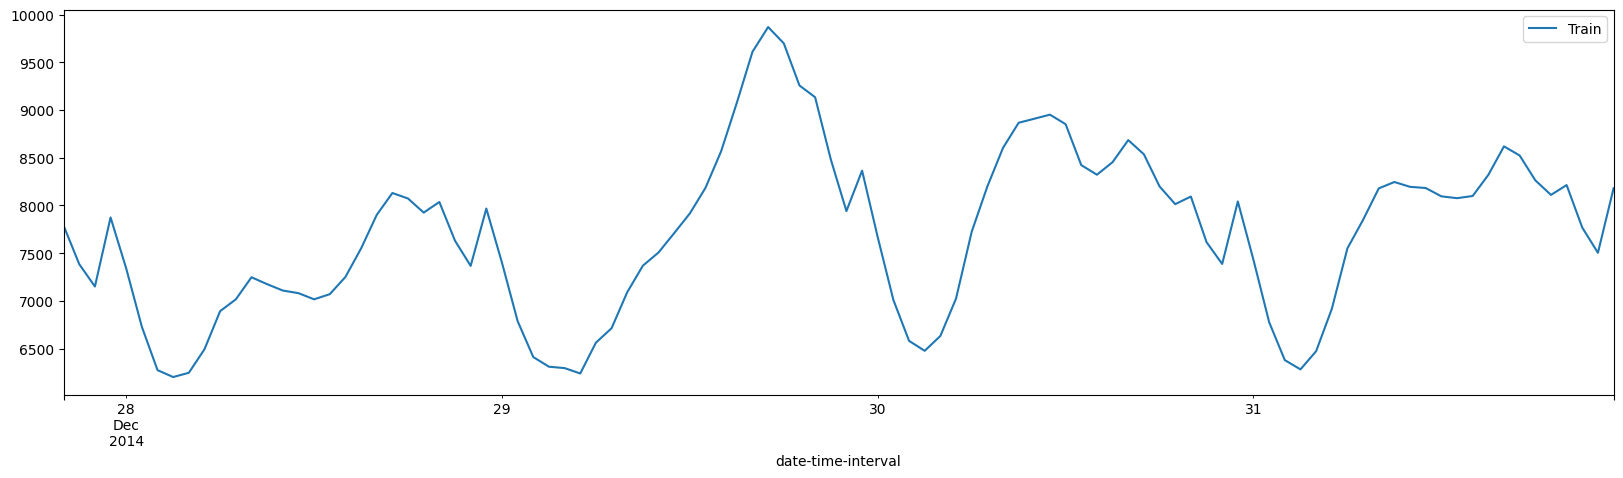

In [117]:
fig, ax = plt.subplots(figsize=(20,5))

y_train[-100:].plot(ax=ax, label='Train')
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

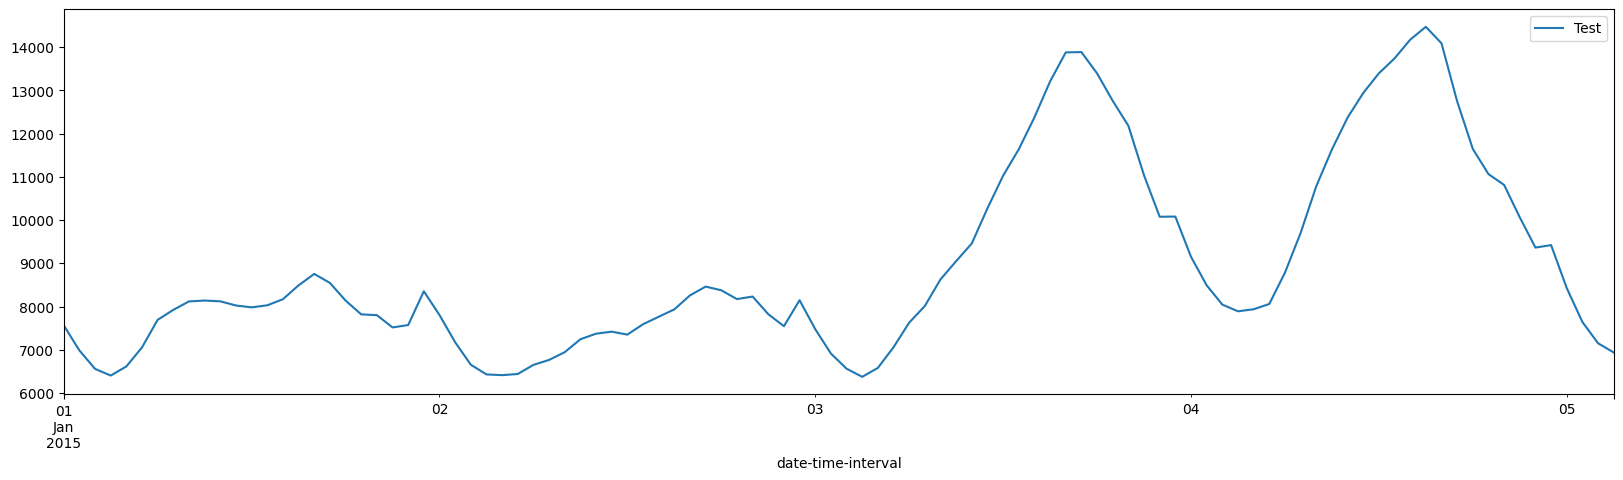

In [118]:
fig, ax = plt.subplots(figsize=(20,5))

y_test[:100].plot(ax=ax, label='Test')
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

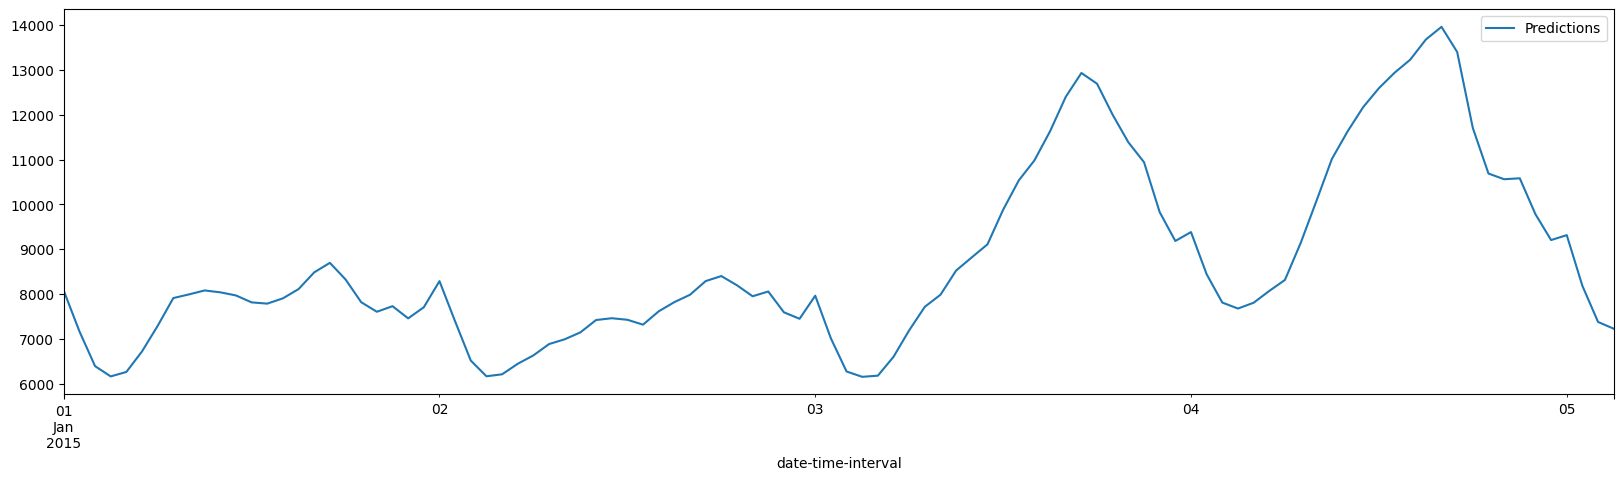

In [119]:
fig, ax = plt.subplots(figsize=(20,5))

y_pred_df[:100].plot(ax=ax, label='Predictions')
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

###### Putting the visuals together

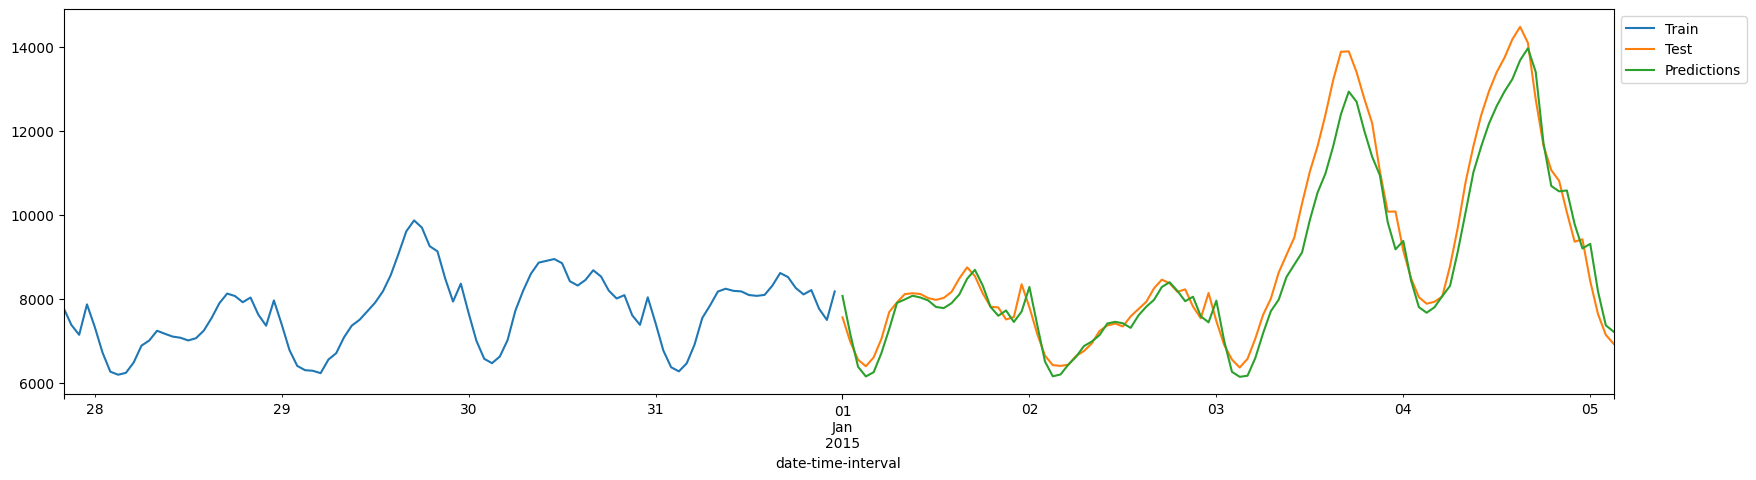

In [120]:
fig, ax = plt.subplots(figsize=(20,5))

y_train[-100:].plot(ax=ax, label='Train')
y_test[:100].plot(ax=ax, label='Test')
y_pred_df[:100].plot(ax=ax, label='Predictions')
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

###### <font color = 'purple'> Train another Model - RandomForestRegressor

In [121]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [122]:
num = 100
seed = 42

In [123]:
model_rf = RandomForestRegressor(n_estimators=num, random_state=seed)
model_rf

RandomForestRegressor(random_state=42)

In [124]:
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [125]:
y_pred_rf = model_rf.predict(X_test)
y_pred_rf[:5]

array([7543.0365225 , 6903.67138558, 6452.35241118, 6403.52475202,
       6560.97406969])

In [126]:
y_pred_rf_DF = pd.DataFrame(y_pred_rf, columns=['energy_demanded'], index=y_test.index)
y_pred_rf_DF.head(2)

,energy_demanded
date-time-interval,
2015-01-01 00:00:00,7543.036522
2015-01-01 01:00:00,6903.671386


###### Convert to Series for visualization purposes

In [127]:
y_pred_rf_df = pd.Series(y_pred_rf, index=y_test.index)
y_pred_rf_df.head(2)

date-time-interval
2015-01-01 00:00:00    7543.036522
2015-01-01 01:00:00    6903.671386
Freq: h, dtype: float64

###### Evaluate the Performance

In [128]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def model_performance():
    mse = mean_squared_error(y_test, y_pred_rf)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred_rf)
    r2 = r2_score(y_test, y_pred_rf)
    print(f"mean_squared_error is: {round(mse,2)}Kw")
    print(f"root_mean_squared_error is: {round(rmse,2)}Kw")
    print(f"mean_absolute_error is: {round(mae,2)}Kw")
    print(f"coefficient_of_determination is: {round(r2,2)*100}%")

model_performance()

mean_squared_error is: 36286.26Kw
root_mean_squared_error is: 190.49Kw
mean_absolute_error is: 135.9Kw
coefficient_of_determination is: 99.0%


In [129]:
y_test.head(2)

date-time-interval
2015-01-01 00:00:00    7566.135266
2015-01-01 01:00:00    6985.052416
Freq: h, Name: energy_demand, dtype: float64

###### <font color = 'purple'> Visualization of the Performance of the model on the train and test data

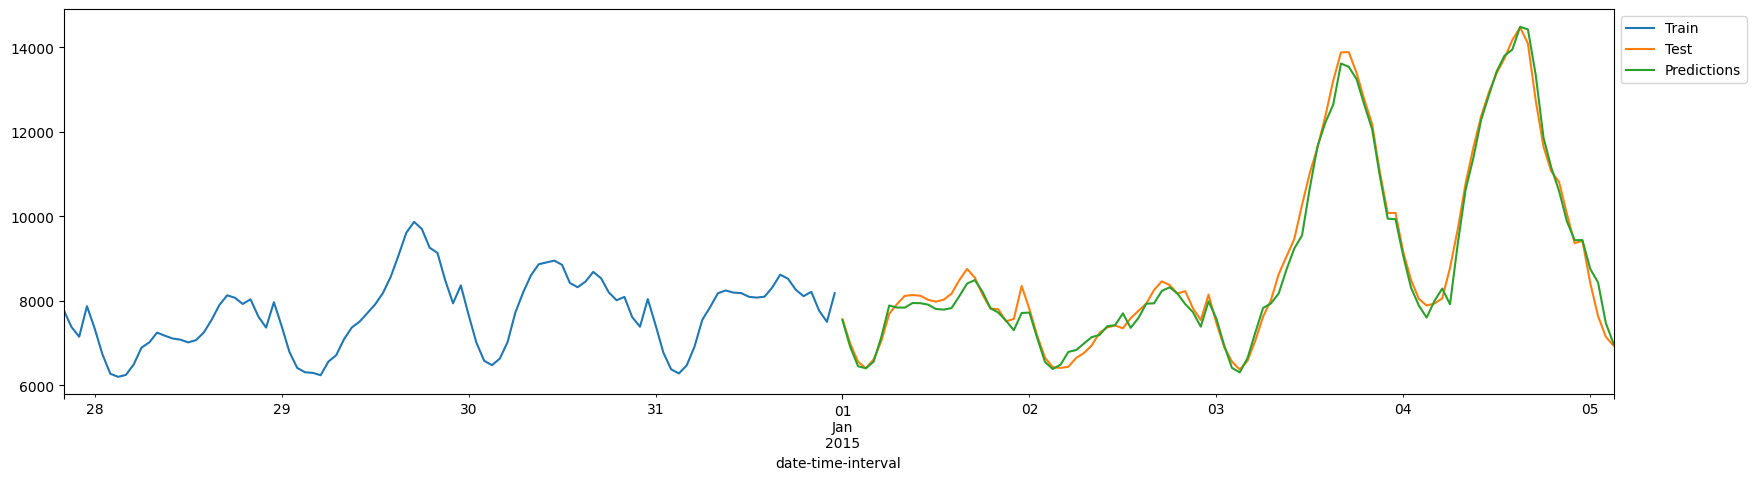

In [130]:
fig, ax = plt.subplots(figsize=(20,5))

y_train[-100:].plot(ax=ax, label='Train')
y_test[:100].plot(ax=ax, label='Test')
y_pred_rf_df[:100].plot(ax=ax, label='Predictions')
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

###### <font color = 'grey'> Save the best Model

In [131]:
import pickle
os.chdir(model)

In [132]:
operational_energy_model = {'operational_forecast_model': model_rf}
with open('operational_energy_model.pkl', 'wb') as file:
    pickle.dump(operational_energy_model, file)

In [133]:
os.chdir(notebk)

## <font color = 'green'> Modeling the Industrial Energy Consumption

##### <font color = 'red'> Building the `time series model` using the `df_ind_clean` dataset

In [134]:
df_ind_clean.head(2)

,Industrial
date-time,
2002-01-02 00:00:00,2174.633908
2002-01-02 01:00:00,2170.025812


In [135]:
ind_clean = df_ind_clean.copy()
ind_clean.head()

,Industrial
date-time,
2002-01-02 00:00:00,2174.633908
2002-01-02 01:00:00,2170.025812
2002-01-02 02:00:00,2167.457006
2002-01-02 03:00:00,2156.462172
2002-01-02 04:00:00,2162.267078


#### Features Engineering
###### <font coor = 'grey'> `Time Shifting and Features` engineering

###### `1Hour` time interval lag

In [136]:
lag = '1h'
ind_clean[f"{lag}_lag"] = ind_clean.Industrial.shift(freq=lag)
ind_clean.head(2)

,Industrial,1h_lag
date-time,,
2002-01-02 00:00:00,2174.633908,NaN
2002-01-02 01:00:00,2170.025812,2174.633908


###### `8Hour` time interval lag

In [137]:
lag = '8h'
ind_clean[f"{lag}_lag"] = ind_clean.Industrial.shift(freq=lag)
ind_clean.head(10)

,Industrial,1h_lag,8h_lag
date-time,,,
2002-01-02 00:00:00,2174.633908,NaN,NaN
2002-01-02 01:00:00,2170.025812,2174.633908,NaN
2002-01-02 02:00:00,2167.457006,2170.025812,NaN
2002-01-02 03:00:00,2156.462172,2167.457006,NaN
2002-01-02 04:00:00,2162.267078,2156.462172,NaN
2002-01-02 05:00:00,2152.148940,2162.267078,NaN
2002-01-02 06:00:00,2145.268110,2152.148940,NaN
2002-01-02 07:00:00,2170.229366,2145.268110,NaN
2002-01-02 08:00:00,2155.848000,2170.229366,2174.633908


###### `24hour` time interval lag

In [138]:
lag = '24h'
ind_clean[f"{lag}_lag"] = ind_clean.Industrial.shift(freq=lag)
ind_clean.head(2)

,Industrial,1h_lag,8h_lag,24h_lag
date-time,,,,
2002-01-02 00:00:00,2174.633908,NaN,NaN,NaN
2002-01-02 01:00:00,2170.025812,2174.633908,NaN,NaN


###### `Weekly_Hour` time interval lag

In [139]:
lag = '6d'
ind_clean[f"{lag}_lag"] = ind_clean.Industrial.shift(freq=lag)
ind_clean.head()

,Industrial,1h_lag,8h_lag,24h_lag,6d_lag
date-time,,,,,
2002-01-02 00:00:00,2174.633908,NaN,NaN,NaN,NaN
2002-01-02 01:00:00,2170.025812,2174.633908,NaN,NaN,NaN
2002-01-02 02:00:00,2167.457006,2170.025812,NaN,NaN,NaN
2002-01-02 03:00:00,2156.462172,2167.457006,NaN,NaN,NaN
2002-01-02 04:00:00,2162.267078,2156.462172,NaN,NaN,NaN


#### <font color = 'green'> Rolling Window or Moving Average Period

`I will be exploring 4, 8 and 24 hours moving average or rolling window on the dataset`

###### `4hours` moving average

In [140]:
lag = '1h'
window_size = 4
mv_avg_4hr = ind_clean.Industrial.rolling(window=window_size).agg(['mean','std']).shift(freq=lag)
mv_avg_4hr.head()

,mean,std
date-time,,
2002-01-02 01:00:00,NaN,NaN
2002-01-02 02:00:00,NaN,NaN
2002-01-02 03:00:00,NaN,NaN
2002-01-02 04:00:00,2167.144724,7.715849
2002-01-02 05:00:00,2164.053017,6.001998


In [141]:
mv_avg_4hr = mv_avg_4hr.add_prefix('4hr_mvavg_')
mv_avg_4hr.head()

,4hr_mvavg_mean,4hr_mvavg_std
date-time,,
2002-01-02 01:00:00,NaN,NaN
2002-01-02 02:00:00,NaN,NaN
2002-01-02 03:00:00,NaN,NaN
2002-01-02 04:00:00,2167.144724,7.715849
2002-01-02 05:00:00,2164.053017,6.001998


###### `8hours` moving average

In [142]:
lag = '1h'
window_size = 8
mv_avg_8hr = ind_clean.Industrial.rolling(window=window_size).agg(['mean','std']).shift(freq=lag)
mv_avg_8hr.head()

,mean,std
date-time,,
2002-01-02 01:00:00,NaN,NaN
2002-01-02 02:00:00,NaN,NaN
2002-01-02 03:00:00,NaN,NaN
2002-01-02 04:00:00,NaN,NaN
2002-01-02 05:00:00,NaN,NaN


In [143]:
mv_avg_8hr = mv_avg_8hr.add_prefix('8hr_mvavg_')
mv_avg_8hr.head()

,8hr_mvavg_mean,8hr_mvavg_std
date-time,,
2002-01-02 01:00:00,NaN,NaN
2002-01-02 02:00:00,NaN,NaN
2002-01-02 03:00:00,NaN,NaN
2002-01-02 04:00:00,NaN,NaN
2002-01-02 05:00:00,NaN,NaN


###### `24hours` moving average

In [144]:
lag = '1h'
window_size = 24
mv_avg_24hr = ind_clean.Industrial.rolling(window=window_size).agg(['mean','std']).shift(freq=lag)
mv_avg_24hr.head()

,mean,std
date-time,,
2002-01-02 01:00:00,NaN,NaN
2002-01-02 02:00:00,NaN,NaN
2002-01-02 03:00:00,NaN,NaN
2002-01-02 04:00:00,NaN,NaN
2002-01-02 05:00:00,NaN,NaN


In [145]:
mv_avg_24hr = mv_avg_24hr.add_prefix('24hr_mvavg_')
mv_avg_24hr.head()

,24hr_mvavg_mean,24hr_mvavg_std
date-time,,
2002-01-02 01:00:00,NaN,NaN
2002-01-02 02:00:00,NaN,NaN
2002-01-02 03:00:00,NaN,NaN
2002-01-02 04:00:00,NaN,NaN
2002-01-02 05:00:00,NaN,NaN


##### <font color = 'purple'> Merge all the statistical and other features created together

In [147]:
df_ind_final = pd.concat([ind_clean, mv_avg_4hr, mv_avg_8hr, mv_avg_24hr], axis=1)
df_ind_final.head(2)

,Industrial,1h_lag,8h_lag,24h_lag,6d_lag,4hr_mvavg_mean,4hr_mvavg_std,8hr_mvavg_mean,8hr_mvavg_std,24hr_mvavg_mean,24hr_mvavg_std
date-time,,,,,,,,,,,
2002-01-02 00:00:00,2174.633908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-02 01:00:00,2170.025812,2174.633908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
df_ind_final.shape

(115393, 11)

###### <font color = 'red'> Extracting date and time features from the date-time - optional

In [149]:
df_ind_final['day'] = df_ind_final.index.dayofweek
df_ind_final['hour'] = df_ind_final.index.hour
df_ind_final['month'] = df_ind_final.index.month
df_ind_final['year'] = df_ind_final.index.year

In [150]:
df_ind_final.head(2)

,Industrial,1h_lag,8h_lag,24h_lag,6d_lag,4hr_mvavg_mean,4hr_mvavg_std,8hr_mvavg_mean,8hr_mvavg_std,24hr_mvavg_mean,24hr_mvavg_std,day,hour,month,year
date-time,,,,,,,,,,,,,,,
2002-01-02 00:00:00,2174.633908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0,1,2002
2002-01-02 01:00:00,2170.025812,2174.633908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,1,2002


In [151]:
df_ind_final.isnull().sum()

Industrial           1
1h_lag               2
8h_lag               9
24h_lag             25
6d_lag             145
4hr_mvavg_mean       4
4hr_mvavg_std        4
8hr_mvavg_mean       8
8hr_mvavg_std        8
24hr_mvavg_mean     24
24hr_mvavg_std      24
day                  0
hour                 0
month                0
year                 0
dtype: int64

###### <font color = 'red'> Removing Missing Values

In [152]:
df_industrial = df_ind_final.copy()

In [153]:
df_industrial = df_industrial.dropna()
df_industrial.isnull().sum()

Industrial         0
1h_lag             0
8h_lag             0
24h_lag            0
6d_lag             0
4hr_mvavg_mean     0
4hr_mvavg_std      0
8hr_mvavg_mean     0
8hr_mvavg_std      0
24hr_mvavg_mean    0
24hr_mvavg_std     0
day                0
hour               0
month              0
year               0
dtype: int64

###### <font color = 'red'> Selecting Features X and Target y

In [154]:
X = df_industrial.drop(columns=['Industrial'])
y = df_industrial['Industrial']

In [155]:
X.head(2)

,1h_lag,8h_lag,24h_lag,6d_lag,4hr_mvavg_mean,4hr_mvavg_std,8hr_mvavg_mean,8hr_mvavg_std,24hr_mvavg_mean,24hr_mvavg_std,day,hour,month,year
date-time,,,,,,,,,,,,,,
2002-01-08 00:00:00,2291.765732,2348.543140,2399.015474,2174.633908,2342.856365,52.19110,2331.809562,47.992999,2328.439593,47.192386,1,0,1,2002
2002-01-08 01:00:00,2287.991084,2312.274842,2343.408824,2170.025812,2338.722811,56.69896,2324.240555,49.720681,2323.813576,45.380189,1,1,1,2002


In [156]:
y.head(2)

date-time
2002-01-08 00:00:00    2287.991084
2002-01-08 01:00:00    2344.714288
Freq: h, Name: Industrial, dtype: float64

In [157]:
print(f'minimum date: {X.index.min()}')
print(f'maximum date: {X.index.max()}')

minimum date: 2002-01-08 00:00:00
maximum date: 2015-03-02 23:00:00


###### <font color = 'red'> Split the selected dataset into train and test

In [158]:
end_train = '2015-02-28 23:59:59'

X_train_ind = X.loc[:end_train]
X_test_ind = X.loc[end_train:]

y_train_ind = y.loc[:end_train]
y_test_ind = y.loc[end_train:]

###### <font color = 'red'> Train the Model Using RandomForestRegressor

In [173]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [174]:
num_of_estimator = 100
seed = 42

In [175]:
model_rf_ind = RandomForestRegressor(n_estimators=num_of_estimator, random_state=seed)
model_rf_ind

RandomForestRegressor(random_state=42)

In [176]:
model_rf_ind.fit(X_train_ind, y_train_ind)

RandomForestRegressor(random_state=42)

###### <font color = 'red'> Predict with the model

In [177]:
y_pred_ind = model_rf_ind.predict(X_test_ind)
y_pred_ind[:5]

array([1534.52810042, 1523.2606427 , 1491.77720632, 1413.15315426,
       1402.10036032])

In [178]:
y_pred_ind_DF = pd.DataFrame(y_pred_ind, columns=['energy_demanded'], index=y_test_ind.index)
y_pred_ind_DF.head(2)

,energy_demanded
date-time,
2015-03-01 00:00:00,1534.528100
2015-03-01 01:00:00,1523.260643


In [179]:
y_pred_ind_series = pd.Series(y_pred_ind, index=y_test_ind.index)
y_pred_ind_series.head(2)

date-time
2015-03-01 00:00:00    1534.528100
2015-03-01 01:00:00    1523.260643
Freq: h, dtype: float64

###### <font color = 'red'> Evaluate the Model Performance

In [180]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def model_performance():
    mse = mean_squared_error(y_test_ind, y_pred_ind)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_ind, y_pred_ind)
    r2 = r2_score(y_test_ind, y_pred_ind)
    print(f"mean_squared_error is: {round(mse,2)}Kw")
    print(f"root_mean_squared_error is: {round(rmse,2)}Kw")
    print(f"mean_absolute_error is: {round(mae,2)}Kw")
    print(f"coefficient_of_determination is: {round(r2,2)*100}%")

model_performance()

mean_squared_error is: 36116.94Kw
root_mean_squared_error is: 190.04Kw
mean_absolute_error is: 105.85Kw
coefficient_of_determination is: 82.0%


In [181]:
len(y_test_ind)

48

###### <font color = 'red'> Visualization of the performance of Train vs Test data using the model

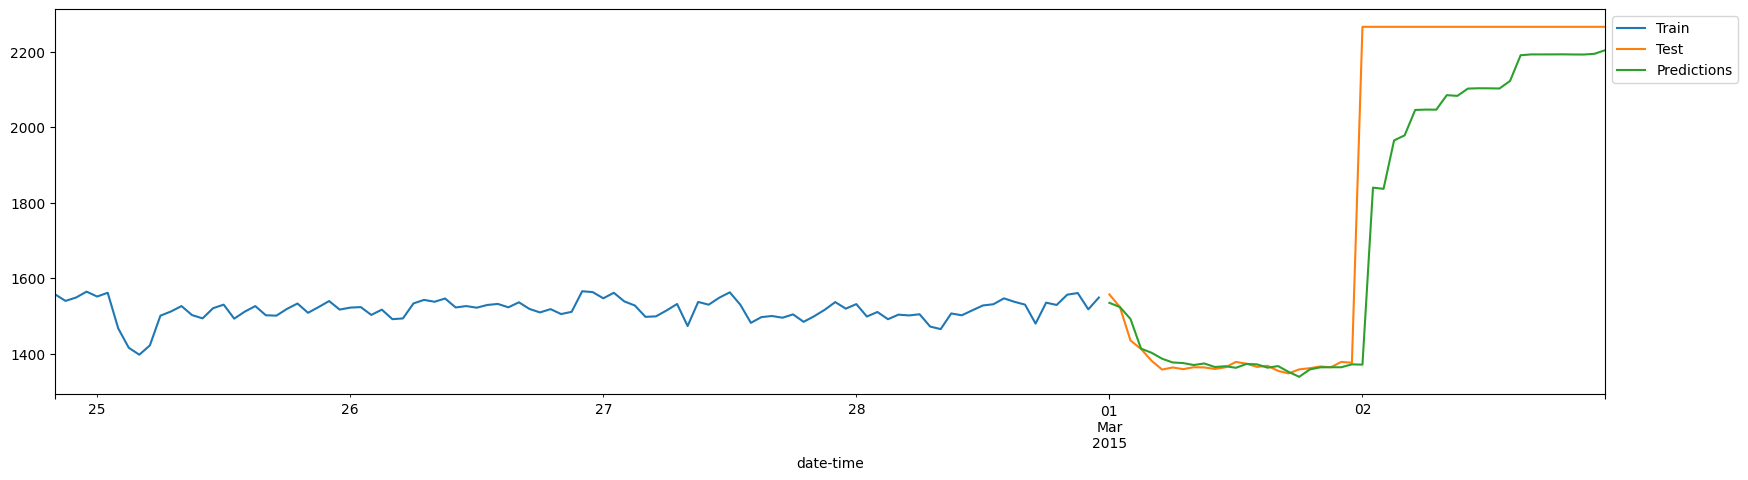

In [183]:
fig, ax = plt.subplots(figsize=(20,5))

y_train_ind[-100:].plot(ax=ax, label='Train')
y_test_ind[:100].plot(ax=ax, label='Test')
y_pred_ind_series[:100].plot(ax=ax, label='Predictions')
ax.legend(bbox_to_anchor=(1.0, 1.0))

###### Saving the model

In [184]:
import pickle
os.chdir(model)

In [185]:
industrial_energy_model = {'industrial_forecast_model': model_rf_ind}
with open('industrial_energy_model.pkl', 'wb') as file:
    pickle.dump(industrial_energy_model, file)

In [186]:
os.chdir(notebk)

## <font color = 'green'> Modeling the Total Energy Consumption

#### <font color = 'purple'> Build a Time Series Model using the total energy consumption dataset - data_clean

In [187]:
data_clean.head(2)

,operations,industrial,total_energy
date-time,,,
2002-01-02 00:00:00,6919.366092,2174.633908,9094.0
2002-01-02 01:00:00,7165.974188,2170.025812,9336.0


###### <font color = 'red'> Select needed column

In [188]:
df_total_energy = data_clean[['total_energy']]
df_total_energy.head()

,total_energy
date-time,
2002-01-02 00:00:00,9094.0
2002-01-02 01:00:00,9336.0
2002-01-02 02:00:00,8574.0
2002-01-02 03:00:00,7972.0
2002-01-02 04:00:00,7660.0


### Features Engineering

###### Time Shifting and features engineering

###### <font color = 'violet'> Hourly Time Shifting

In [189]:
lag = '1h'
df_total_energy[f"{lag}_lag"] = df_total_energy.total_energy.shift(freq=lag)
df_total_energy.head(2)

C:\Users\Olanrewaju Adegoke\AppData\Local\Temp\ipykernel_17128\2710460456.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_energy[f"{lag}_lag"] = df_total_energy.total_energy.shift(freq=lag)


,total_energy,1h_lag
date-time,,
2002-01-02 00:00:00,9094.0,NaN
2002-01-02 01:00:00,9336.0,9094.0


###### <font color = 'violet'> `8Hour` time shifting lag

In [190]:
lag = '8h'
df_total_energy[f"{lag}_lag"] = df_total_energy.total_energy.shift(freq=lag)

###### <font color = 'violet'> `24Hour` time shifting lag

In [191]:
lag = '24h'
df_total_energy[f"{lag}_lag"] = df_total_energy.total_energy.shift(freq=lag)

###### <font color = 'violet'> Weekly time shifting

In [192]:
lag = '6d'
df_total_energy[f"{lag}_lag"] = df_total_energy.total_energy.shift(freq=lag)

In [193]:
df_total_energy.head()

,total_energy,1h_lag,8h_lag,24h_lag,6d_lag
date-time,,,,,
2002-01-02 00:00:00,9094.0,NaN,NaN,NaN,NaN
2002-01-02 01:00:00,9336.0,9094.0,NaN,NaN,NaN
2002-01-02 02:00:00,8574.0,9336.0,NaN,NaN,NaN
2002-01-02 03:00:00,7972.0,8574.0,NaN,NaN,NaN
2002-01-02 04:00:00,7660.0,7972.0,NaN,NaN,NaN


#### Rolling Window or Moving Average - `2hours and 24hours rolling window`

###### `2Hour` Moving Average

In [194]:
lag = '1h'
window_size = 2
mv_avg_2hr_total = df_total_energy.total_energy.rolling(window=window_size).agg(['mean','std']).shift(freq=lag)
mv_avg_2hr_total.head()

,mean,std
date-time,,
2002-01-02 01:00:00,NaN,NaN
2002-01-02 02:00:00,9215.0,171.119841
2002-01-02 03:00:00,8955.0,538.815367
2002-01-02 04:00:00,8273.0,425.678282
2002-01-02 05:00:00,7816.0,220.617316


###### Renaming the columns

In [195]:
mv_avg_2hr_total = mv_avg_2hr_total.add_prefix('mv_avg_2hr_')
mv_avg_2hr_total.head(2)

,mv_avg_2hr_mean,mv_avg_2hr_std
date-time,,
2002-01-02 01:00:00,NaN,NaN
2002-01-02 02:00:00,9215.0,171.119841


###### `24hour` Moving Average

In [196]:
lag = '1h'
window_size = 24
mv_avg_24hr_total = df_total_energy.total_energy.rolling(window=window_size).agg(['mean','std']).shift(freq=lag)
mv_avg_24hr_total = mv_avg_24hr_total.add_prefix('mv_avg_24hr_')
mv_avg_24hr_total.head(2)

,mv_avg_24hr_mean,mv_avg_24hr_std
date-time,,
2002-01-02 01:00:00,NaN,NaN
2002-01-02 02:00:00,NaN,NaN


#### Concatenate all the calculated statistics and other features

In [197]:
df_total = pd.concat([df_total_energy, mv_avg_2hr_total, mv_avg_24hr_total], axis=1)
df_total.head(2)

,total_energy,1h_lag,8h_lag,24h_lag,6d_lag,mv_avg_2hr_mean,mv_avg_2hr_std,mv_avg_24hr_mean,mv_avg_24hr_std
date-time,,,,,,,,,
2002-01-02 00:00:00,9094.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-02 01:00:00,9336.0,9094.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### Extract all `time and date` features

In [198]:
df_total['hour'] = df_total.index.hour
df_total['day'] = df_total.index.dayofweek
df_total['month'] = df_total.index.month
df_total['year'] = df_total.index.year

In [199]:
df_total.head()

,total_energy,1h_lag,8h_lag,24h_lag,6d_lag,mv_avg_2hr_mean,mv_avg_2hr_std,mv_avg_24hr_mean,mv_avg_24hr_std,hour,day,month,year
date-time,,,,,,,,,,,,,
2002-01-02 00:00:00,9094.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,1,2002
2002-01-02 01:00:00,9336.0,9094.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,1,2002
2002-01-02 02:00:00,8574.0,9336.0,NaN,NaN,NaN,9215.0,171.119841,NaN,NaN,2,2,1,2002
2002-01-02 03:00:00,7972.0,8574.0,NaN,NaN,NaN,8955.0,538.815367,NaN,NaN,3,2,1,2002
2002-01-02 04:00:00,7660.0,7972.0,NaN,NaN,NaN,8273.0,425.678282,NaN,NaN,4,2,1,2002


###### Check for missing values

In [200]:
df_total.isnull().sum()

total_energy          1
1h_lag                2
8h_lag                9
24h_lag              25
6d_lag              145
mv_avg_2hr_mean       2
mv_avg_2hr_std        2
mv_avg_24hr_mean     24
mv_avg_24hr_std      24
hour                  0
day                   0
month                 0
year                  0
dtype: int64

###### Remove all missing values

In [201]:
df_total_clean = df_total.copy()

In [202]:
df_total_clean = df_total_clean.dropna()

In [203]:
df_total_clean.isnull().sum()

total_energy        0
1h_lag              0
8h_lag              0
24h_lag             0
6d_lag              0
mv_avg_2hr_mean     0
mv_avg_2hr_std      0
mv_avg_24hr_mean    0
mv_avg_24hr_std     0
hour                0
day                 0
month               0
year                0
dtype: int64

###### Select Features X and Target y

In [204]:
X = df_total_clean.drop(columns=['total_energy'])
y = df_total_clean['total_energy']

In [205]:
print(f'minimum date: {X.index.min()}')
print(f'maximum date: {X.index.max()}')

minimum date: 2002-01-08 00:00:00
maximum date: 2015-03-02 23:00:00


###### Split selected features and target into train and test sets

In [206]:
end_pt = '2015-02-28 23:59:59'

X_train_total = X.loc[:end_pt]
X_test_total = X.loc[end_pt:]

y_train_total = y.loc[:end_pt]
y_test_total = y.loc[end_pt:]

###### <font color = 'violet'> Train the Model for Total energy Consumed

In [207]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [208]:
num_estimator = 100
seed = 42

In [209]:
model_rf_total = RandomForestRegressor(n_estimators=num_estimator, random_state=seed)
model_rf_total

RandomForestRegressor(random_state=42)

In [210]:
model_rf_total.fit(X_train_total, y_train_total)

RandomForestRegressor(random_state=42)

###### <font color = 'violet'> Make Predictions with the model

In [211]:
y_pred_total = model_rf_total.predict(X_test_total)
y_pred_total[:5]

array([9678.75, 9059.38, 8722.69, 8510.66, 8779.52])

In [212]:
y_pred_total_DF = pd.DataFrame(y_pred_total, columns=['total_energy'], index=y_test_total.index)
y_pred_total_DF.head(2)

,total_energy
date-time,
2015-03-01 00:00:00,9678.75
2015-03-01 01:00:00,9059.38


In [213]:
y_pred_total_series = pd.Series(y_pred_total, index=y_test_total.index)
y_pred_total_series.head(2)

date-time
2015-03-01 00:00:00    9678.75
2015-03-01 01:00:00    9059.38
Freq: h, dtype: float64

###### <font color = 'violet'> Evaluate the Performance of the Trained Model

In [214]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def model_performance():
    mse = mean_squared_error(y_test_total, y_pred_total)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_total, y_pred_total)
    r2 = r2_score(y_test_total, y_pred_total)
    print(f"mean_squared_error is: {round(mse,2)}Kw")
    print(f"root_mean_squared_error is: {round(rmse,2)}Kw")
    print(f"mean_absolute_error is: {round(mae,2)}Kw")
    print(f"coefficient_of_determination is: {round(r2,2)*100}%")

model_performance()

mean_squared_error is: 175093.36Kw
root_mean_squared_error is: 418.44Kw
mean_absolute_error is: 219.29Kw
coefficient_of_determination is: 81.0%


In [215]:
y_test_total.head(2)

date-time
2015-03-01 00:00:00    9560.0
2015-03-01 01:00:00    9046.0
Freq: h, Name: total_energy, dtype: float64

###### <font color = 'violet'> Visualization of Training and Testing dataset

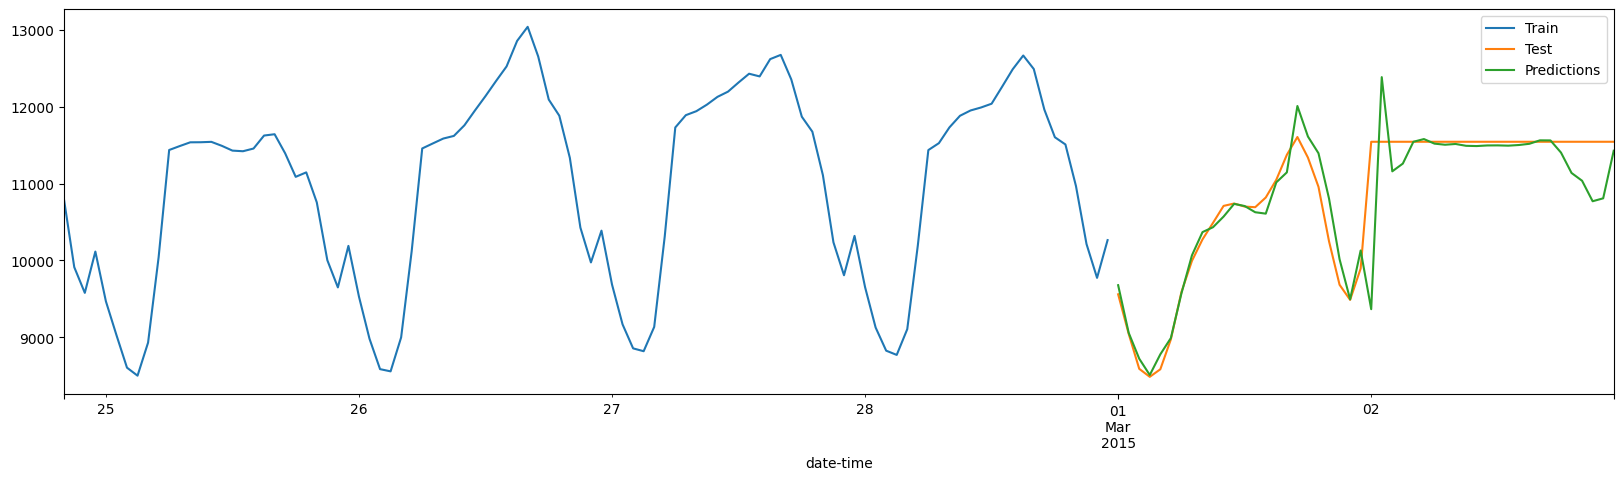

In [216]:
fig, ax = plt.subplots(figsize=(20,5))

y_train_total[-100:].plot(ax=ax, label='Train')
y_test_total[:100].plot(ax=ax, label='Test')
y_pred_total_series[:100].plot(ax=ax, label='Predictions')
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

###### <font color = 'violet'> Saving the Model for Total Energy Consumed

In [217]:
import pickle
os.chdir(model)

total_energy_model = {'total_energy_forecast_model': model_rf_total}
with open('total_energy_model.pkl', 'wb') as f:
    pickle.dump(total_energy_model, f)

os.chdir(notebk)

## <font color = 'green'> Forecasting the `total energy` consumption for the future

Forecasting known entities over time is a time series problems and are useful in `finance`, `manufacturing`, `sales`, `inventory`, `pharmacautical` etc.

Time series data are data that track a given entity over time and this entity are not randomized. Time series data has entity constant but what changes is time and the properties of the entity over time. 

###### <font color = 'grey'> `Operational forecasting`, `Industrial forecasting` and `Organizational forecasting` for energy consumption

In [286]:
df_total_clean.head()

,total_energy,1h_lag,8h_lag,24h_lag,6d_lag,mv_avg_2hr_mean,mv_avg_2hr_std,mv_avg_24hr_mean,mv_avg_24hr_std,hour,day,month,year
date-time,,,,,,,,,,,,,
2002-01-08 00:00:00,9096.0,9582.0,10806.0,9122.0,9094.0,9371.0,298.399062,9500.916667,863.982081,0,1,1,2002
2002-01-08 01:00:00,9554.0,9096.0,10756.0,9484.0,9336.0,9339.0,343.653896,9499.833333,864.494005,1,1,1,2002
2002-01-08 02:00:00,8912.0,9554.0,10448.0,8842.0,8574.0,9325.0,323.854906,9502.750000,864.556345,2,1,1,2002
2002-01-08 03:00:00,8514.0,8912.0,10176.0,8320.0,7972.0,9233.0,453.962554,9505.666667,862.345571,3,1,1,2002
2002-01-08 04:00:00,8502.0,8514.0,10016.0,8084.0,7660.0,8713.0,281.428499,9513.750000,851.590494,4,1,1,2002


###### Loading the saved `total_energy model`

In [219]:
os.chdir(model)

with open('total_energy_model.pkl', 'rb') as file:
    energy_model = pickle.load(file)

os.chdir(notebk)


total_energy_model = energy_model['total_energy_forecast_model']
total_energy_model

RandomForestRegressor(random_state=42)

###### Testing the model for making some random predictions

In [220]:
feat_test = df_total_clean.copy()

In [221]:
feat_arr = feat_test.values

sample = feat_arr[20, 1:]
sample

array([9.53800000e+03, 1.10160000e+04, 1.00160000e+04, 8.83000000e+03,
       9.66900000e+03, 1.85261977e+02, 1.00030833e+04, 8.57604749e+02,
       2.00000000e+01, 1.00000000e+00, 1.00000000e+00, 2.00200000e+03])

In [222]:
total_energy_model.predict(sample.reshape(1, 12))[0]

C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


9700.0

##### `Time Series Analysis snippet`
If linear relationship exist between what is been measured and time - the approach adopted above works most of the time.

Multiple features such as consumer demographics, income features, competitor factors, type of transformers used to push out the energy, which plant is generating the energy etc are involve in the forecasting a simple algorithmic models may not be enough to generate relationships in the data. Therefore, we would use a stronger tool to perform the analysis such as `ARIMA`, `LongTermShortTermMemoryModel - LSTM`, `Facebook Prophet`, `Convolutional Neural Network`.

## Forecasting into the future

###### <font color = 'grey'> To forecast into the future using the `total_energy` model, I would need to find a way of generating all the features we engineered for the future forecast. 

###### In this case of `total_energy`, we have engineered the following features - `['1h_lag', '8h_lag', '24h_lag', '6d_lag', 'mv_avg_2hr_mean', 'mv_avg_2hr_std', 'mv_avg_24hr_mean', 'mv_avg_24hr_std', 'hour', 'day', 'month', 'year']` with the target as `total_energy`. 

###### One way is to build a model that will predict each of the enigineered features using the time_dependent columns.

In [287]:
df_total_clean.head(2)

,total_energy,1h_lag,8h_lag,24h_lag,6d_lag,mv_avg_2hr_mean,mv_avg_2hr_std,mv_avg_24hr_mean,mv_avg_24hr_std,hour,day,month,year
date-time,,,,,,,,,,,,,
2002-01-08 00:00:00,9096.0,9582.0,10806.0,9122.0,9094.0,9371.0,298.399062,9500.916667,863.982081,0,1,1,2002
2002-01-08 01:00:00,9554.0,9096.0,10756.0,9484.0,9336.0,9339.0,343.653896,9499.833333,864.494005,1,1,1,2002


###### Selecting the columns

In [288]:
features = df_total_clean.drop(columns=['total_energy'])
target = df_total_clean['total_energy']

In [289]:
features.head()

,1h_lag,8h_lag,24h_lag,6d_lag,mv_avg_2hr_mean,mv_avg_2hr_std,mv_avg_24hr_mean,mv_avg_24hr_std,hour,day,month,year
date-time,,,,,,,,,,,,
2002-01-08 00:00:00,9582.0,10806.0,9122.0,9094.0,9371.0,298.399062,9500.916667,863.982081,0,1,1,2002
2002-01-08 01:00:00,9096.0,10756.0,9484.0,9336.0,9339.0,343.653896,9499.833333,864.494005,1,1,1,2002
2002-01-08 02:00:00,9554.0,10448.0,8842.0,8574.0,9325.0,323.854906,9502.750000,864.556345,2,1,1,2002
2002-01-08 03:00:00,8912.0,10176.0,8320.0,7972.0,9233.0,453.962554,9505.666667,862.345571,3,1,1,2002
2002-01-08 04:00:00,8514.0,10016.0,8084.0,7660.0,8713.0,281.428499,9513.750000,851.590494,4,1,1,2002


In [226]:
target.head()

date-time
2002-01-08 00:00:00    9096.0
2002-01-08 01:00:00    9554.0
2002-01-08 02:00:00    8912.0
2002-01-08 03:00:00    8514.0
2002-01-08 04:00:00    8502.0
Freq: h, Name: total_energy, dtype: float64

In [227]:
print(f'minimum date is: {features.index.min()}')
print(f'minimum date is: {features.index.max()}')

minimum date is: 2002-01-08 00:00:00
minimum date is: 2015-03-02 23:00:00


###### Split the data into train and test set

In [228]:
end_pt = '2015-02-28 23:59:59'

X_train = features.loc[:end_pt]
X_test = features.loc[end_pt:]

y_train = target.loc[:end_pt]
y_test = target.loc[end_pt:]

print(f'The length of X_train is {len(X_train)}')
print(f'The length of X_test is {len(X_test)}')
print(f'The length of y_train is {len(y_train)}')
print(f'The length of y_test is {len(y_test)}')

The length of X_train is 115200
The length of X_test is 48
The length of y_train is 115200
The length of y_test is 48


###### Using the X_train data to build model that can predict each of the engineered features into the future

In [229]:
X_train.head(2)

,1h_lag,8h_lag,24h_lag,6d_lag,mv_avg_2hr_mean,mv_avg_2hr_std,mv_avg_24hr_mean,mv_avg_24hr_std,hour,day,month,year
date-time,,,,,,,,,,,,
2002-01-08 00:00:00,9582.0,10806.0,9122.0,9094.0,9371.0,298.399062,9500.916667,863.982081,0,1,1,2002
2002-01-08 01:00:00,9096.0,10756.0,9484.0,9336.0,9339.0,343.653896,9499.833333,864.494005,1,1,1,2002


Here, we focus mainly on the train data and select column(s) of interest and use these selected column(s) to build a model that can predict each engineered columns into the future. 

For simplicity, we would be selecting the time formatted columns - `hour`, `day`, `month`, `year`. The choice of this is simply because,they were generated from the date and not depending on either lag or window values.

###### From X_train data, we select the time dependent columns to predict each engineered features starting with `1h_lag`

In [230]:
cols = ['hour', 'day', 'month', 'year', '1h_lag']

In [231]:
df = X_train[cols]
df.head()

,hour,day,month,year,1h_lag
date-time,,,,,
2002-01-08 00:00:00,0,1,1,2002,9582.0
2002-01-08 01:00:00,1,1,1,2002,9096.0
2002-01-08 02:00:00,2,1,1,2002,9554.0
2002-01-08 03:00:00,3,1,1,2002,8912.0
2002-01-08 04:00:00,4,1,1,2002,8514.0


###### Select the features and target from the dataframe containing time dependent columns and the target

In [232]:
X = df.drop(columns=['1h_lag'])
y = df['1h_lag']

In [233]:
print(f'The minimum date is {X.index.min()}')
print(f'The maximum date is {X.index.max()}')

The minimum date is 2002-01-08 00:00:00
The maximum date is 2015-02-28 23:00:00


###### Split the dataset

In [234]:
end_pt = '2015-01-31 23:59:59'

X_trainF = X.loc[:end_pt]
X_testF = X.loc[end_pt:]

y_trainF = y.loc[:end_pt]
y_testF = y.loc[end_pt:]

In [235]:
print(f'length of X_train is {len(X_testF)}')

length of X_train is 672


###### Building the model that predict each features into the features starting with `1h_lag`

In [251]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [252]:
num_estimator = 100
seed = 42

In [253]:
model_feature = RandomForestRegressor(n_estimators=num_estimator, random_state=seed)
model_feature

RandomForestRegressor(random_state=42)

###### Fit the model

In [254]:
model_feature.fit(X_trainF, y_trainF)

RandomForestRegressor(random_state=42)

###### Make predictions with the model

In [255]:
y_pred_feature = model_feature.predict(X_testF)
y_pred_feature[:5]

array([10383.56192857,  9633.01853319,  8973.1822684 ,  8563.29563095,
        8379.28179762])

In [256]:
y_pred_feature_df = pd.DataFrame(y_pred_feature, columns=['1h_lag'], index=y_testF.index)
y_pred_feature_df.head()

,1h_lag
date-time,
2015-02-01 00:00:00,10383.561929
2015-02-01 01:00:00,9633.018533
2015-02-01 02:00:00,8973.182268
2015-02-01 03:00:00,8563.295631
2015-02-01 04:00:00,8379.281798


In [257]:
y_pred_feature_series = pd.Series(y_pred_feature, index=y_testF.index)
y_pred_feature_series.head()

date-time
2015-02-01 00:00:00    10383.561929
2015-02-01 01:00:00     9633.018533
2015-02-01 02:00:00     8973.182268
2015-02-01 03:00:00     8563.295631
2015-02-01 04:00:00     8379.281798
Freq: h, dtype: float64

###### Evaluate the Performance of the Model

In [258]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def model_performance():
    mse = mean_squared_error(y_testF, y_pred_feature)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_testF, y_pred_feature)
    r2 = r2_score(y_testF, y_pred_feature)
    print(f"mean_squared_error is: {round(mse,2)}Kw")
    print(f"root_mean_squared_error is: {round(rmse,2)}Kw")
    print(f"mean_absolute_error is: {round(mae,2)}Kw")
    print(f"coefficient_of_determination is: {round(r2,2)*100}%")

model_performance()

mean_squared_error is: 1501789.62Kw
root_mean_squared_error is: 1225.48Kw
mean_absolute_error is: 798.74Kw
coefficient_of_determination is: 50.0%


###### Visualization of the Training and the Testing data

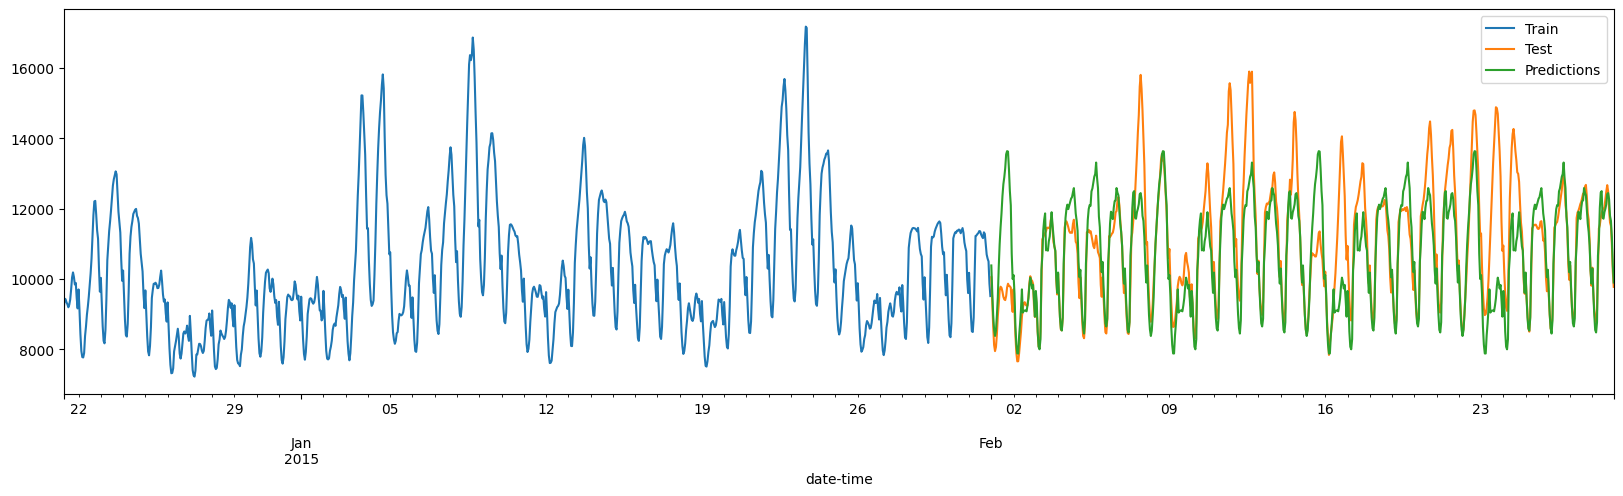

In [259]:
fig, ax = plt.subplots(figsize=(20,5))

y_trainF[-1000:].plot(ax=ax, label='Train')
y_testF[:1000].plot(ax=ax, label='Test')
y_pred_feature_series.iloc[:1000].plot(ax=ax, label='Predictions')
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

###### Preprocessing for *features engineering*

In [386]:
def energy_features_engineering(df, target, cut_off, model):
    
    cols_for_time = ['hour', 'day', 'month', 'year']
    features = df.drop(columns=[target])
    target = df[target]
    feat = features.drop(columns=cols_for_time)
    
    for col in feat.columns:
        
        if col == '1h_lag':
            df = features[cols_for_time + [col]]
            X = df.drop(columns=col)
            y = df[col]
            x_train = X.loc[:cut_off]
            x_test = X.loc[cut_off:]
            y_train = y.loc[:cut_off]
            y_test = y.loc[cut_off:]
            one_hr_lag = model
            one_hr_lag.fit(x_train, y_train)
            pred_1hr_lag = one_hr_lag.predict(x_test)
            pred_1hr_lag_df = pd.DataFrame(pred_1hr_lag, columns=[col], index=x_test.index)
            r1 = r2_score(y_test, pred_1hr_lag)
            
        if col == '8h_lag':
            df = features[cols_for_time + [col]]
            X = df.drop(columns=col)
            y = df[col]
            x_train = X.loc[:cut_off]
            x_test = X.loc[cut_off:]
            y_train = y.loc[:cut_off]
            y_test = y.loc[cut_off:]
            eight_hr_lag = model
            eight_hr_lag.fit(x_train, y_train)
            pred_8hr_lag = eight_hr_lag.predict(x_test)
            pred_8hr_lag_df = pd.DataFrame(pred_8hr_lag, columns=[col], index=x_test.index)
            r8 = r2_score(y_test, pred_8hr_lag)

        if col == '24h_lag':
            df = features[cols_for_time + [col]]
            X = df.drop(columns=col)
            y = df[col]
            x_train = X.loc[:cut_off]
            x_test = X.loc[cut_off:]
            y_train = y.loc[:cut_off]
            y_test = y.loc[cut_off:]
            twenty_four_hr_lag = model
            twenty_four_hr_lag.fit(x_train, y_train)
            pred_24hr_lag = twenty_four_hr_lag.predict(x_test)
            pred_24hr_lag_df = pd.DataFrame(pred_24hr_lag, columns=[col], index=x_test.index)
            r24 = r2_score(y_test, pred_24hr_lag)

        if col == '6d_lag':
            df = features[cols_for_time + [col]]
            X = df.drop(columns=col)
            y = df[col]
            x_train = X.loc[:cut_off]
            x_test = X.loc[cut_off:]
            y_train = y.loc[:cut_off]
            y_test = y.loc[cut_off:]
            six_day_lag = model
            six_day_lag.fit(x_train, y_train)
            pred_6d_lag = six_day_lag.predict(x_test)
            pred_6d_lag_df = pd.DataFrame(pred_6d_lag, columns=[col], index=x_test.index)
            r6d = r2_score(y_test, pred_6d_lag)

        if col == 'mv_avg_2hr_mean':
            df = features[cols_for_time + [col]]
            X = df.drop(columns=col)
            y = df[col]
            x_train = X.loc[:cut_off]
            x_test = X.loc[cut_off:]
            y_train = y.loc[:cut_off]
            y_test = y.loc[cut_off:]
            mv_avg_2hr_mean = model
            mv_avg_2hr_mean.fit(x_train, y_train)
            pred_mv_avg_2hr_mean = mv_avg_2hr_mean.predict(x_test)
            pred_mv_avg_2hr_mean_df = pd.DataFrame(pred_mv_avg_2hr_mean, columns=[col], index=x_test.index)
            r2hrmean = r2_score(y_test, pred_mv_avg_2hr_mean)

        if col == 'mv_avg_2hr_std':
            df = features[cols_for_time + [col]]
            X = df.drop(columns=col)
            y = df[col]
            x_train = X.loc[:cut_off]
            x_test = X.loc[cut_off:]
            y_train = y.loc[:cut_off]
            y_test = y.loc[cut_off:]
            mv_avg_2hr_std = model
            mv_avg_2hr_std.fit(x_train, y_train)
            pred_mv_avg_2hr_std = mv_avg_2hr_std.predict(x_test)
            pred_mv_avg_2hr_std_df = pd.DataFrame(pred_mv_avg_2hr_std, columns=[col], index=x_test.index)
            r2hstd = r2_score(y_test, pred_mv_avg_2hr_std)

        if col == 'mv_avg_24hr_mean':
            df = features[cols_for_time + [col]]
            X = df.drop(columns=col)
            y = df[col]
            x_train = X.loc[:cut_off]
            x_test = X.loc[cut_off:]
            y_train = y.loc[:cut_off]
            y_test = y.loc[cut_off:]
            mv_avg_24hr_mean = model
            mv_avg_24hr_mean.fit(x_train, y_train)
            pred_mv_avg_24hr_mean = mv_avg_24hr_mean.predict(x_test)
            pred_mv_avg_24hr_mean_df = pd.DataFrame(pred_mv_avg_24hr_mean, columns=[col], index=x_test.index)
            r24hmean = r2_score(y_test, pred_mv_avg_24hr_mean)

        if col == 'mv_avg_24hr_std':
            df = features[cols_for_time + [col]]
            X = df.drop(columns=col)
            y = df[col]
            x_train = X.loc[:cut_off]
            x_test = X.loc[cut_off:]
            y_train = y.loc[:cut_off]
            y_test = y.loc[cut_off:]
            mv_avg_24hr_std = model
            mv_avg_24hr_std.fit(x_train, y_train)
            pred_mv_avg_24hr_std = mv_avg_24hr_std.predict(x_test)
            pred_mv_avg_24hr_std_df = pd.DataFrame(pred_mv_avg_24hr_std, columns=[col], index=x_test.index)
            r24hstd = r2_score(y_test, pred_mv_avg_24hr_std)
            
    model_dict = {'1h_lag':one_hr_lag, '8h_lag':eight_hr_lag, '24h_lag':twenty_four_hr_lag, '6d_lag':six_day_lag, 'mv_avg_2hr_mean':mv_avg_2hr_mean,
                 'mv_avg_2hr_std':mv_avg_2hr_std, 'mv_avg_24hr_mean':mv_avg_24hr_mean, 'mv_avg_24hr_std':mv_avg_24hr_std}
    
    feat_future = pd.concat([pred_1hr_lag_df, pred_8hr_lag_df, pred_24hr_lag_df, pred_6d_lag_df, pred_mv_avg_2hr_mean_df,
                            pred_mv_avg_2hr_std_df, pred_mv_avg_24hr_mean_df, pred_mv_avg_24hr_std_df], axis=1)
    
    print(f"coefficient_of_determination for 1hr is: {round(r1,2)*100}%")
    print(f"coefficient_of_determination for 8hr is: {round(r8,2)*100}%")
    print(f"coefficient_of_determination for 24hr is: {round(r24,2)*100}%")
    print(f"coefficient_of_determination for 6dlag is: {round(r6d,2)*100}%")
    print(f"coefficient_of_determination for 2hrmean is: {round(r2hrmean,2)*100}%")
    print(f"coefficient_of_determination for 2hrstd is: {round(r2hstd,2)*100}%")
    print(f"coefficient_of_determination for 24hrmean is: {round(r24hmean,2)*100}%")
    print(f"coefficient_of_determination for 24hrstd is: {round(r24hstd,2)*100}%")
        
    return model_dict, feat_future

In [387]:
df = df_total_clean
num_estimator = 100
seed = 42
target = 'total_energy'
cut_off = '2015-01-31 23:59:59'
rf_model = RandomForestRegressor(n_estimators=num_estimator, random_state=seed)

model_dict, feat_future = energy_features_engineering(df=df, target=target, cut_off=cut_off, model=rf_model)

coefficient_of_determination for 1hr is: 43.0%
coefficient_of_determination for 8hr is: 48.0%
coefficient_of_determination for 24hr is: 62.0%
coefficient_of_determination for 6dlag is: 44.0%
coefficient_of_determination for 2hrmean is: 42.0%
coefficient_of_determination for 2hrstd is: 66.0%
coefficient_of_determination for 24hrmean is: -23.0%
coefficient_of_determination for 24hrstd is: -2.0%


In [362]:
model_dict

{'1h_lag': RandomForestRegressor(random_state=42),
 '8h_lag': RandomForestRegressor(random_state=42),
 '24h_lag': RandomForestRegressor(random_state=42),
 '6d_lag': RandomForestRegressor(random_state=42),
 'mv_avg_2hr_mean': RandomForestRegressor(random_state=42),
 'mv_avg_2hr_std': RandomForestRegressor(random_state=42),
 'mv_avg_24hr_mean': RandomForestRegressor(random_state=42),
 'mv_avg_24hr_std': RandomForestRegressor(random_state=42)}

In [385]:
feat_future.head()

,1h_lag,8h_lag,24h_lag,6d_lag,mv_avg_2hr_mean,mv_avg_2hr_std,mv_avg_24hr_mean,mv_avg_24hr_std
date-time,,,,,,,,
2015-02-01 00:00:00,10383.561929,13122.901274,9617.749377,9309.538103,10177.331516,278.067396,11162.409282,1524.208080
2015-02-01 01:00:00,9633.018533,12702.717630,8988.597175,8478.762494,10017.017140,541.824257,11089.201841,1507.019387
2015-02-01 02:00:00,8973.182268,12038.270405,8584.508403,8119.392728,9296.302596,465.696276,11168.907875,1545.792258
2015-02-01 03:00:00,8563.295631,11911.004425,8517.228365,7934.655873,8779.187032,275.056715,11213.430305,1580.622419
2015-02-01 04:00:00,8379.281798,11323.981456,8749.997353,7867.982540,8488.608750,103.695893,11095.084773,1568.167711


###### Saving the model that populate the engineered features

In [367]:
import pickle
os.chdir(model)

engineered_features_model = model_dict
with open('engineered_feature_forecast_model.pkl', 'wb') as file:
    pickle.dump(engineered_features_model, file)

os.chdir(notebk)

###### Loading the models -> *Engineered features model*

In [368]:
os.chdir(model)

with open('engineered_feature_forecast_model.pkl', 'rb') as file:
    features_forecast = pickle.load(file)

os.chdir(notebk)


hourly_lag = features_forecast['1h_lag']
eight_hour_lag = features_forecast['8h_lag']
twenty_four_hour_lag = features_forecast['24h_lag']
six_day_lag = features_forecast['6d_lag']
mv_avg_2hr_mean = features_forecast['mv_avg_2hr_mean']
mv_avg_2hr_std = features_forecast['mv_avg_2hr_std']
mv_avg_24hr_mean = features_forecast['mv_avg_24hr_mean']
mv_avg_24hr_std = features_forecast['mv_avg_24hr_std']

###### Loading the models -> *total_energy model*

In [373]:
os.chdir(model)

with open('total_energy_model.pkl', 'rb') as file:
    energy_model = pickle.load(file)

os.chdir(notebk)

total_energy_model = energy_model['total_energy_forecast_model']
total_energy_model

RandomForestRegressor(random_state=42)

###### The Inference Pipeline

In [388]:
hourly_lag
eight_hour_lag
twenty_four_hour_lag
six_day_lag
mv_avg_2hr_mean
mv_avg_2hr_std
mv_avg_24hr_mean
mv_avg_24hr_std

total_energy_model

def future_total_energy_prediction(start_date, num_of_hours):
    cols = ['1h_lag', '8h_lag', '24h_lag', '6d_lag', 'mv_avg_2hr_mean',
       'mv_avg_2hr_std', 'mv_avg_24hr_mean', 'mv_avg_24hr_std']

    start_date = pd.to_datetime(start_date)
    date_time_sequence = pd.date_range(start_date, periods=num_of_hours, freq='h')
    date_time_df = pd.DataFrame(date_time_sequence, columns=['date_time'])
    date_time = date_time_df.set_index('date_time')
    date_time['hour'] = date_time.index.hour
    date_time['day'] = date_time.index.dayofweek
    date_time['month'] = date_time.index.month
    date_time['year'] = date_time.index.year
    
    for col in cols:
        
        if col == '1h_lag':
            pred_1hr_lag = hourly_lag.predict(date_time)
            pred_1hr_lag_df = pd.DataFrame(pred_1hr_lag, columns=[col], index=date_time.index)
            
        if col == '8h_lag':
            
            pred_8hr_lag = eight_hour_lag.predict(date_time)
            pred_8hr_lag_df = pd.DataFrame(pred_8hr_lag, columns=[col], index=date_time.index)

        if col == '24h_lag':
            
            pred_24hr_lag = twenty_four_hour_lag.predict(date_time)
            pred_24hr_lag_df = pd.DataFrame(pred_24hr_lag, columns=[col], index=date_time.index)

        if col == '6d_lag':
            
            pred_6d_lag = six_day_lag.predict(date_time)
            pred_6d_lag_df = pd.DataFrame(pred_6d_lag, columns=[col], index=date_time.index)

        if col == 'mv_avg_2hr_mean':
            
            pred_mv_avg_2hr_mean = mv_avg_2hr_mean.predict(date_time)
            pred_mv_avg_2hr_mean_df = pd.DataFrame(pred_mv_avg_2hr_mean, columns=[col], index=date_time.index)

        if col == 'mv_avg_2hr_std':
            
            pred_mv_avg_2hr_std = mv_avg_2hr_std.predict(date_time)
            pred_mv_avg_2hr_std_df = pd.DataFrame(pred_mv_avg_2hr_std, columns=[col], index=date_time.index)

        if col == 'mv_avg_24hr_mean':
            
            pred_mv_avg_24hr_mean = mv_avg_24hr_mean.predict(date_time)
            pred_mv_avg_24hr_mean_df = pd.DataFrame(pred_mv_avg_24hr_mean, columns=[col], index=date_time.index)

        if col == 'mv_avg_24hr_std':

            pred_mv_avg_24hr_std = mv_avg_24hr_std.predict(date_time)
            pred_mv_avg_24hr_std_df = pd.DataFrame(pred_mv_avg_24hr_std, columns=[col], index=date_time.index)
    
    futuristic_features = pd.concat([pred_1hr_lag_df, pred_8hr_lag_df, pred_24hr_lag_df, pred_6d_lag_df, pred_mv_avg_2hr_mean_df,
                            pred_mv_avg_2hr_std_df, pred_mv_avg_24hr_mean_df, pred_mv_avg_24hr_std_df, date_time], axis=1)

    # Prediction
    total_energy_predicted = total_energy_model.predict(futuristic_features)
    total_energy_df = pd.DataFrame(total_energy_predicted, columns=[f'future_{num_of_hours}_hours_of_total_energy'], index=date_time.index)
       
    return total_energy_df

In [391]:
future_total_energy_prediction(start_date='2026-01-31 23:59:59', num_of_hours=300)

,future_300_hours_of_total_energy
date_time,
2026-01-31 23:59:59,7433.72
2026-02-01 00:59:59,7376.03
2026-02-01 01:59:59,7376.03
2026-02-01 02:59:59,7376.03
2026-02-01 03:59:59,7376.03
...,...
2026-02-13 06:59:59,7435.49
2026-02-13 07:59:59,7435.49
2026-02-13 08:59:59,7435.49


##### `Note Please`
Now that we have built function that uses a define model and predict `all the engineered features` using the `time dependent` columns as input features  -> `hour`, `day`, `month` and `year`,then concatenate all the predicted engineered columns as the synthetic inputs into the future and use the primary model that was built for the `total energy` to predict the total energy consumption into the future. These seems to be time taken and rigorous but I have built a function that can achieve this for us at once.

# <font color = 'green'> *THANK YOU*